# Proyecto 1
# Análisis mercado inmobiliario en base a la empresa Properati

DS-25 / Elizabet Kenny / Junio 2020


## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones **crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.**

### Datos que creo necesario para resolver el problema:



* fecha de construcción
* fecha de puesta en venta
* tipo de propiedad
* habitaciones
* baños
* cochera
* piso 
* ciudad
* barrio
* accesibilidad (transporte público disponible)
* m2 total del inmueble
* m2 cubierto del inmueble
* servicios disponibles - agua
* servicios disponibles - luz
* servicios disponibles - gas

Estas son las variables que, en este primer momento, creo importantes para poder resolver el problema planteado y crear un modelo de predicción de precio de venta a inmuebles.
En primera instancia la fecha de finalización de la construcción y la fecha en la que se pone a la venta: aquí puedo saber la **antigüedad** de la misma.

Luego, considero fundamental el **tipo de propiedad** ya que no es lo mismo un monoambiente que un Lote o una Casa con 10 habitaciones. Por esto también, las variables de habitaciones, baño y cochera son fundamentales ya que los **ambientes** hacen a su valor, generalmente. Además, incorporo la variable del piso para, en caso de ser departamento sabér dónde se ubica y en caso de ser casa u otro inmuble saber si cuenta con más pisos del mismo.

La **ubicación** también es fundamental y por otro lado hay variables de valoraciones de éstas mismas que marcaran su valor, las viviendas cercanas y su tipo, etc. Por esta razón, considero la **accesibilidad** importante también, es decir, qué tipo de movilidades hay disponibles para trasladarse libremente por la zona. 

El **tamaño** físico en metros cuadrados es otra variable considerada, por eso puedo diferenciar entre el total y el cubierto, es decir si tiene patio disponible o balcón también cuenta como valor de venta.
Finalmente, creo importante conocer el **estado de los servicios públicos como agua, luz y gas** ya que su disponibilidad pública o privada también hace a su accesibilidad o al tipo de comodidad que uno tenga viviendo o no allí. 

En este primer razonamiento considero estos como infaltable atributos en un escenario ideal de análisis. Sin embargo, por ultimo (y no menos importante) vale destacar hay otro tipo de información super importante que es el **punto comercial** del mismo, es decir, la **información y objetivos de la empresa** Properati, plazos, metodología, cliente ideal, plaza geográfica, entre otros.



Ahora bien, para comenzar a resolver la problematica a trabajar en este proyecto, se ofrece como recurso una muestra del conjunto de publicaciones de propiedades en venta dentro de la inmobiliaria Properati disponible en su página web. 
https://www.properati.com.ar/

### Los atributos 
A continuación vamos a describir los atributos(columnas) que contiene el Dataset con el que trabajaremos en éste proyecto y tendremos como referencia inicial:

(Los mismos correponden en parte al **Esquema de avisos** de la empresa inmobiliaria)

* **start_date** - Fecha de alta del aviso.
* **end_date** - Fecha de baja del aviso.
* **created_on** - Fecha de alta de la primera versión del aviso.
* **lat** - Latitud.
* **lon** - Longitud.
* **l1** - Nivel administrativo 1: país.
* **l2** - Nivel administrativo 2: usualmente provincia.
* **l3** - Nivel administrativo 3: usualmente ciudad.
* **rooms** - Cantidad de ambientes (útil en Argentina).
* **bedrooms** - Cantidad de dormitorios (útil en el resto de los países).
* **bathrooms** - Cantidad de baños.
* **surface_total** - Superficie total en m².
* **surface_covered** - Superficie cubierta en m².
* **price** - precio en la moneda especificada en currency
* **currency**- divisa en la que está expresada la publicación
* **title** - Título del anuncio.
* **description** - Descripción del anuncio.
* **property_type** - tipo de propiedad (casa, departamento, ph, etcétera)
* **operation_type** - Tipo de operación (Venta, Alquiler).





## Analisis Exploratorio de Datos

Comenzaremos a explorar los datos que tenemos desde la empresa para entender con qué datos contamos, limpiarlo y así continuar hacia la resolución del problema planteado.

Primero importaremos las librerias y configuraciones necesarias en Python: 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Ahora cargarémos el dataset de la inmobiliaria para comenzar a visualizarlo y trabajarlo. 

Le pedirémos que nos muestre su tamaño, es decir cuántas filas y columnas (utilizando la función `shape`) y luego mostraremos sus cinco primeras fijas, utilizando la función `head`:

*(cada fila aquí es una anuncio diferente)*

In [2]:
data = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv') 
print('Tamaño del dataset inicial es de {} filas y {} columnas.'.format(*data.shape))
data.head(5)

Tamaño del dataset inicial es de 146660 filas y 19 columnas.


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


¿Tenemos **valores faltates** en nuestro dataset? 

Importante tener esto en cuenta por si luego nos afectan en nuestras interpretaciones y/o operaciones.

In [3]:
faltantes = data.isnull().sum()
print('Valores Faltantes por atributos:')
print(faltantes)
print(data.shape)

Valores Faltantes por atributos:
start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64
(146660, 19)



¿Cuántos **tipos de propiedad** hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? 

Responderemos esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn.

In [4]:
print('Los tipos de propiedades en anuncios son: ', data['property_type'].unique())

print(data['property_type'].value_counts())

Los tipos de propiedades en anuncios son:  ['Departamento' 'PH' 'Casa' 'Lote' 'Casa de campo' 'Oficina' 'Otro'
 'Local comercial' 'Cochera' 'Depósito']
Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64


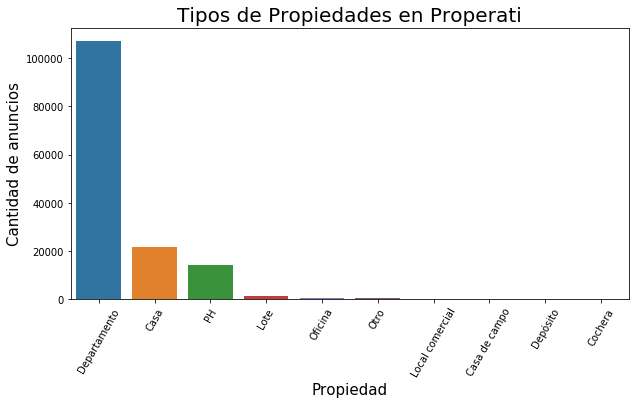

In [5]:
plt.figure(figsize = (10,5))

sns.countplot(data = data, x = 'property_type', 
              order = data.property_type.value_counts().index )
plt.xticks(rotation= 60)
plt.ylabel('Cantidad de anuncios', size = 15)
plt.xlabel('Propiedad', size = 15)
plt.title('Tipos de Propiedades en Properati', size=20)
plt.show()

Aquí podemos notar a simple vista la preponderancia de la categoría `Departamento` por sobre las demás, lo cual no nos deja destacar claramente la pequeña diferencia numerica entre los tipos de inmuebles menos predominantes, como lo vemos numericamente en las celdas anteriores.
Para su mejor visualización filtraremos para ampliar la vista de los otros tipos de inmueble:


In [6]:
data_tipos = data[(data.property_type.isin(['Casa de campo','Oficina','Lote','Otro','Local comercial','Cochera','Depósito']))]


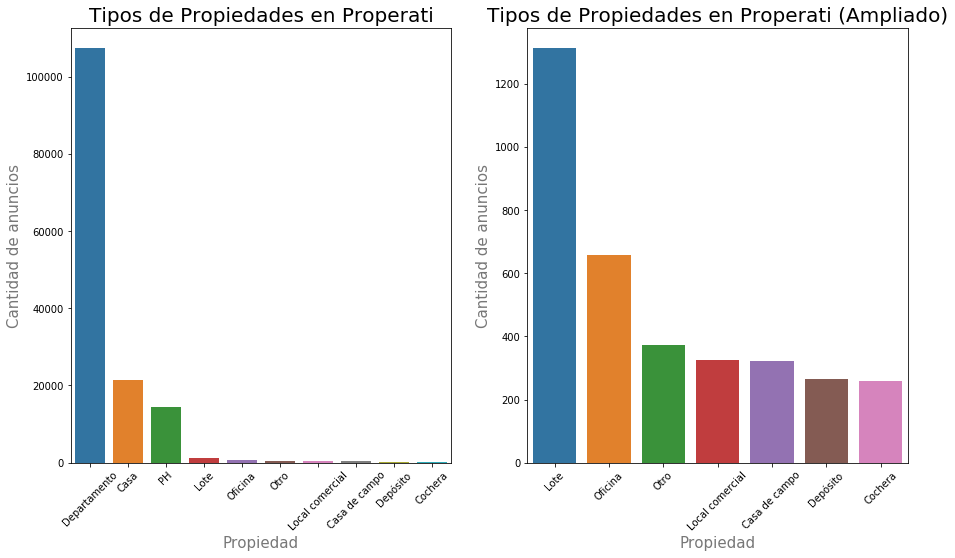

In [7]:
plt.figure(figsize = (15,8))

plt.subplot(1,2,1)
sns.countplot(data = data, x = 'property_type', order = data.property_type.value_counts().index )
plt.xticks(rotation= 45)
plt.ylabel('Cantidad de anuncios', size = 15, color ='#777777')
plt.xlabel('Propiedad', size = 15, color ='#777777')
plt.title('Tipos de Propiedades en Properati', size=20)

plt.subplot(1,2,2)
sns.countplot(data = data_tipos, x = 'property_type', order = data_tipos.property_type.value_counts().index )
plt.xticks(rotation= 45)
plt.ylabel('Cantidad de anuncios', size = 15, color ='#777777')
plt.xlabel('Propiedad', size = 15, color ='#777777')
plt.title('Tipos de Propiedades en Properati (Ampliado)', size=20)


plt.show()

Ahora bien, ¿de qué **regiones** son las publicaciones?

Para ello aplicaremos gráficos de Matplotlib:

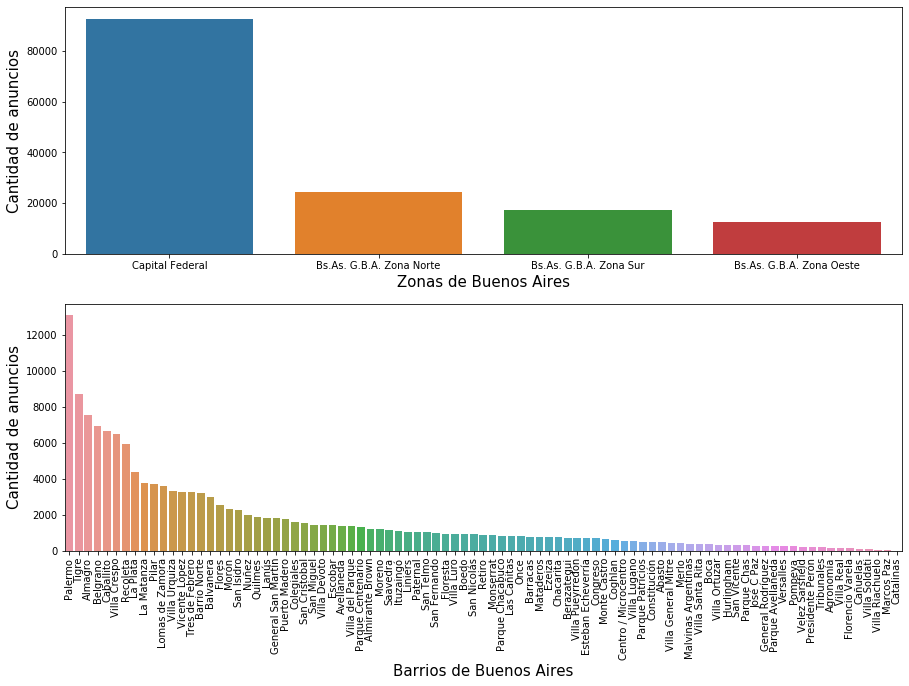

In [8]:
plt.figure(figsize = (15,10))

plt.subplot(2,1,1)
sns.countplot(data = data, x = 'l2', order = data.l2.value_counts().index)
plt.xlabel('Zonas de Buenos Aires', size = 15)
plt.ylabel('Cantidad de anuncios', size = 15)


plt.subplot(2,1,2)
sns.countplot(data = data, x = 'l3',order = data.l3.value_counts().index)
plt.xticks(rotation= 90)
plt.xlabel('Barrios de Buenos Aires', size = 15)
plt.ylabel('Cantidad de anuncios', size = 15)

plt.show()

Con estos graficos podemos observar que la zona de **Capital Federal contine la mayor cantidad de anuncios de propiedades en ésta inmobiliaria. En ella se destaca el Barrio de Palermo por sobre los otros.**

#### Filtral el Dataset

Como parte de lo interpretado anteriormente, filtraremos las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas en un nuevo dataset con el que continuaremos trabajando, el cual lo separaremos con un nombre distinto: `data_clean`. De esta forma comenzaremos a chicar y limpiar nuestros datos para una mejor u objetiva interpretación de los mismos.

In [9]:
data_clean = data[(data['l2'] == "Capital Federal") & (data.property_type.isin(['Departamento','Casa','PH']))]
data_clean.shape

(91485, 19)

**Checkpoint**: *91485 instacias, 19 columnas.*

Graficaremos ahora los 3 tipos de propiedades en Capital Federal

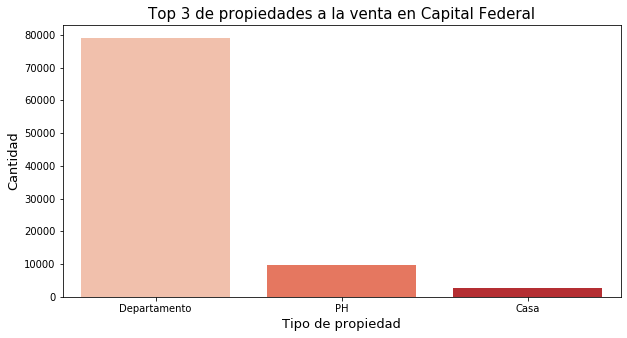

In [10]:
plt.figure(figsize = (10,5))
sns.countplot(x='property_type', data = data_clean, palette='Reds')
plt.xlabel('Tipo de propiedad', size = 13)
plt.ylabel('Cantidad', size = 13)
plt.title('Top 3 de propiedades a la venta en Capital Federal', size = 15)

plt.show() 

Aquí notamos cómo la propiedad `PH` ha superado a `Casa` (dónde anteriormente podíamos ver en el primer grafico de 'Tipos de propiedad'). Podemos decir entonces que **el mayor numero de venta de casas se encuentra fuera de Capital Federal**, en los barrios de Gran Buenos Aires.

**Distribuciones y relaciones de a pares**

Para profundizar en nuestro analisis de datos, generaremos un primer pantallazo estadistico de los atributos con la función `describe`:

In [11]:
data_clean.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,86951.000000,86937.000000,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,-34.599081,-58.436002,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,0.023957,0.036297,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,-34.696419,-58.530468,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,-34.613757,-58.459605,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,-34.599446,-58.433789,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,-34.584148,-58.410143,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,-34.535818,-58.353930,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


Aquí tenemos algunos aspectos a remarcar de éstos atributos:

`rooms`:
En esta instancia puedo destacar el número máximo de ambientes en un inmueble de 26. Lo cual es excesivo y atípico a mi criterio, seguramente se trate de un outlier (valor atípico).

`bedrooms`:
En cuanto a las habitaciones, notamos que hay anuncios con valores de 0, seguramente se trate de monoambientes que podemos corroborar más adelante ya que lo coherente es que se trate como tipo de propiedad 'Departamento'. Y además, un máximo de 15 habitaciones, al igual que en 'rooms', entendemos que se trata también de un outlier.

`bathbrooms`:
Misma lectura que en ´rooms´, aca podemos destacar un outlier en su valor máximo de 14 baños en una propiedad, siendo veridico o no, entendemos que un inmueble con 14 baños no es algo tipico.


`lat` y  `lon`
Las columnas de lat y lon no van a ser analizadas posteriormente por lo que puedo descartar esta información.


A toda esta lectura le puedo sumar que **lo que más me llama la atención en estos números es la diferencia entre la instancia q muestra el 75% de la muestra y la instancia del valor máximo en el atributo.** La diferencia aquí es sutancial en `rooms`, `bedrooms`, `bathbrooms`, `surface_total` y `surface_covered` (outliers o errores); por ejemplo imaginar una propiedad con una superficie total de 126.062 m2 en la Capital Federal es algo realmente atipico a mi criterio, pues nos enfrentamos a valores que en este punto estimo que serán muy importantes en la influencia al obtener el precio de una propiedad. Los exploraremos a continuación.

Como pude mostrar anteriormente, sabemos que en el dataset hay varios valores faltantes en anuncios, sobre todo en los atributos que refieren a las superficies de los inmuebles (totales y cubiertas) - los cuales consideramos importantes a priori -, mediciones como latitudes y longitudes, y tambien un atributo importante como es si el inmueble tiene baño(bathrooms). Lo mejor sería aquí filtarlos del dataset con el que seguiremos trabajando ya que puede alterar nuestros resultados y trabajar con instancias de anuncios completos como modelos. 

In [12]:
data = data.dropna() #función para eliminar los valores faltantes del data set

In [13]:
faltantes = data.isnull().sum()
print('Valores Faltantes') 
print(faltantes) #corroboramos que ya no hayan valore faltantes 
print(data.shape) #vemos en qué medida cambia el tamaño de nuestro dataset

Valores Faltantes
start_date         0
end_date           0
created_on         0
lat                0
lon                0
l1                 0
l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
currency           0
title              0
description        0
property_type      0
operation_type     0
dtype: int64
(114488, 19)


Además, en linea a simplificar mi dataset, consiedero importante hacerle algunas preguntas (que intuyo nos ayudarán a eliminar atributos redundantes) antes de profundizar en estos outliers que destaqué anteriormente.

* **¿Hay otra divisa en los precios?**
* **¿Hay otro tipo de operación inmobiliaria en los anunción del dataset?**
* **¿Hay anuncios de otro país?**


In [14]:
print(data_clean['currency'].unique())  #¿Hay otra divisa en los precios?

['USD']


**Sólo contamos con anuncios en venta con precio en USD** por lo tanto eliminaré la columna `curency` y aclararé esto en el nombre de la columna price:

In [15]:
data_clean = data_clean.drop(['currency'], axis=1)

In [16]:
data_clean.rename(columns={'price': 'price_USD'}, inplace=True) #renombrar

In [17]:
print(data_clean['operation_type'].unique()) #¿Hay otro tipo de operación inmobiliaria en los anunción del dataset?

['Venta']


**Sólo contamos con anuncios que ofrecen VENTA**, por lo tanto eliminaré la columna `operation_type`  para evitar su redundancia.

In [18]:
data_clean = data_clean.drop(['operation_type'], axis=1)

In [19]:
print(data_clean['l1'].unique()) #¿Hay anuncios de otro país?

['Argentina']


**Sólo contamos con anuncios de venta de Argentina**, por lo tanto eliminaré la columna `l1` para evitar su redundancia, como hicimos anteriormente:

In [20]:
data_clean = data_clean.drop(['l1'], axis=1)

Por otro lado, ya sabemos que en éste dataset argentino hemos filtramos la ciudad de 'Capital Federal' al comienzo del proyecto, por lo tanto la columna `l2` también es redundante.

In [21]:
data_clean = data_clean.drop(['l2'], axis=1)

Y finalmente, procedo a eliminar `lat` y `log` que, como observé anteriormente, no me será útil en este análisis de obtener el precio de tasación. De la misma forma sucede con las columnas de fechas. Si fueran las fechas de construcción de las viviendas sería útil, pero como no es el caso puedo descartarlas ya que se tratan de fechas utiles para el procedimiento a la hora de la publicidad.

In [22]:
data_clean = data_clean.drop(['lon','lat','start_date','end_date','created_on'], axis=1)


Ahora bien, continuaremos con la exploración de las columnas que notamos anteriormente con valores outliers, por esta razón ahora graficaremos la distribución y la relación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` en relación a cada tipo de propiedad.


Comenzaré entonces, explorando los atributos `rooms`, `bedrooms` y `bathrooms` al ser variables discretas:

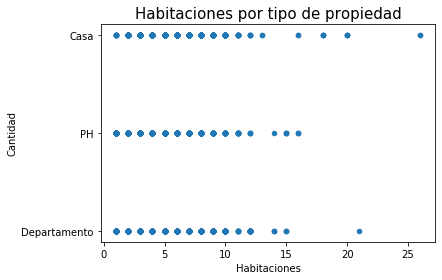

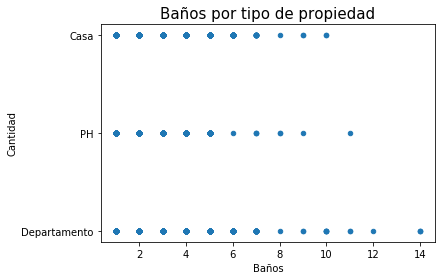

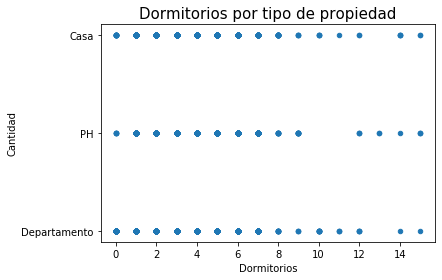

In [23]:
data_clean.plot.scatter(y ='property_type', x ='rooms')
plt.title('Habitaciones por tipo de propiedad', size=15)
plt.xlabel('Habitaciones')
plt.ylabel('Cantidad')

data_clean.plot.scatter(y ='property_type', x ='bathrooms')
plt.title('Baños por tipo de propiedad', size=15)
plt.xlabel('Baños')
plt.ylabel('Cantidad')

data_clean.plot.scatter(y ='property_type', x ='bedrooms')
plt.title('Dormitorios por tipo de propiedad', size=15)
plt.xlabel('Dormitorios')
plt.ylabel('Cantidad')

plt.show()

Ahora bien, decidimos mostrar éstas categorias en primera instancia con la función de grafica `scatter` dónde podemos destacar los valores atípicos que vimos numéricamente con la función `describe`.

Profundizaremos ahora detenídamente en estos valores que se alejan de la media y el quartil 0.75.

In [24]:
print('Ambientes:\n', data_clean.rooms.value_counts().sort_index()) #¿cuántos valores tenemos por unidades?

Ambientes:
 1.0      8842
2.0     27249
3.0     28327
4.0     18414
5.0      5461
6.0      1824
7.0       710
8.0       405
9.0        80
10.0       80
11.0       29
12.0       35
13.0        2
14.0        4
15.0        7
16.0        5
18.0        4
20.0        4
21.0        1
26.0        2
Name: rooms, dtype: int64


In [25]:
data_clean[data_clean.rooms > 8].head(20)

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price_USD,title,description,property_type
456,Villa del Parque,10.0,8.0,4.0,2000.0,1400.0,5000000.0,"Venta de Casa,Villa del Parque,1400m2,",Corredor Responsable: Mónica Silvia Martinuzzi...,Casa
2901,Palermo,10.0,4.0,3.0,290.0,270.0,1450000.0,Scalabrini Ortiz 3200,Arquitecto Aiseson. Gran recepción a living y ...,Departamento
3205,Mataderos,9.0,8.0,4.0,141.0,141.0,285000.0,PH 9 AMBIENTES HOSTEL PENSION FAMILIA NUMEROSA,Corredor Responsable: Gustavo Guastello - C.U....,PH
3206,San Telmo,10.0,8.0,2.0,470.0,292.0,400000.0,Emblemática propiedad de San Telmo - 10 Ambientes,Corredor Responsable: Juan Carlos Treco - CUCI...,PH
3709,Caballito,9.0,8.0,4.0,338.0,258.0,550000.0,VENTA EDIFICIO EN BLOCK - 2 PHs Y LOCAL CABALLITO,Corredor Responsable: Raul Hector Merlo - CUCI...,PH
3711,Recoleta,10.0,7.0,5.0,168.0,168.0,370000.0,VENTA DEPARTAMENTO IDEAL OFICINAS CLÍNICA,Corredor Responsable: Ariel Champanier - CUCIC...,Departamento
3712,Caballito,16.0,8.0,4.0,443.0,467.0,760000.0,Venta - Casa en Caballito / Parque Centenario,Corredor Responsable: Marcelo Trujillo - CUCIC...,Casa
4235,Parque Chacabuco,9.0,8.0,5.0,375.0,375.0,320000.0,CASA EN VENTA,Corredor Responsable: Martin Macagno - CUCICBA...,Casa
4236,Villa Luro,10.0,10.0,2.0,160.0,160.0,320000.0,Casa para flia. numerosa / hostel / centro médico,Corredor Responsable: Fernando Muñoz - CUCICBA...,Casa
5149,Pompeya,10.0,7.0,4.0,350.0,240.0,430000.0,Venta de Casa Multifamiliar LOTE PROPIO en Pom...,Corredor Responsable: Hernan Perrone - C.U.C.I...,Casa


In [26]:
print('Las propiedades con más de 7 ambientes respresentan el', 
      round((data_clean[data_clean.rooms > 7].shape[0]/data_clean.rooms.shape[0])*100,2),'% de nuestro dataset al momento.')


Las propiedades con más de 7 ambientes respresentan el 0.72 % de nuestro dataset al momento.


Al el `title` de los anuncios de venta que las propiedades con un valor mayor de 7 ambientes se puede apreciar que algunas son viviendas multifamiliares, hostels, centros médicos. Tambien observo varios errores en los anuncios, como por ejemplo uno que en realidad dice 'venta de 9 departamentos' y figura como uno sólo con 9 ambientes. En este caso se tratan de errores de tipeo o carga de datos.
Por lo que decido hacer un filtrado a todas las propiedades con un valor menor razonable de 7 `rooms` al representar un porcentaje muy minoritario del dataset.

In [27]:
data_clean = data_clean[data_clean.rooms < 8]
data_clean.shape

(90827, 10)

In [28]:
print('Baños:\n', data_clean.bathrooms.value_counts().sort_index())

Baños:
 1.0     54729
2.0     23470
3.0      7442
4.0      2253
5.0       605
6.0       125
7.0        22
8.0         2
9.0         1
10.0        4
11.0        3
12.0        1
14.0        3
Name: bathrooms, dtype: int64


In [29]:
data_clean[data_clean.bathrooms > 5].head(20)

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price_USD,title,description,property_type
5854,Belgrano,7.0,6.0,6.0,1200.0,600.0,2200000.0,Venta Casa 7 Ambientes Con Dependencia y Gran ...,Venta espectacular casa 7 ambientes con espaci...,Casa
7656,Belgrano,7.0,6.0,6.0,400.0,750.0,1580000.0,"Casa de 7 amb.C/Jardín,Piscina, Quincho y Sauna!",Corredor Responsable: SANTIAGO CRUCIANI - CPI ...,Casa
8206,Caballito,5.0,4.0,6.0,269.0,195.0,777800.0,DONNA Reggia by Azcuy,DONNA Reggia by Azcuy. Duplex 5 ambientes con ...,Departamento
8207,Caballito,5.0,4.0,6.0,345.0,209.0,930300.0,DONNA Reggia by Azcuy,DONNA Reggia by Azcuy. Duplex 5 ambientes con ...,Departamento
8208,Caballito,5.0,4.0,6.0,345.0,209.0,760100.0,DONNA Reggia by Azcuy,DONNA Reggia by Azcuy. Duplex 5 ambientes con ...,Departamento
8209,Caballito,5.0,4.0,6.0,220.0,177.0,567000.0,DONNA Fiore by Azcuy. Semipiso en triple frent...,Semipiso en triple frente. Departamento de 5 a...,Departamento
11243,Recoleta,6.0,4.0,6.0,300.0,280.0,980000.0,RETIRO VENTA ESPECTACULAR CUATRO DORMITORIOS E...,EXCLUSIVO PISO EN TORRRE DE LUJO SOBRE AVENIDA...,Departamento
13324,Belgrano,7.0,6.0,6.0,400.0,750.0,1580000.0,"Casa de 7 amb.C/Jardín,Piscina, Quincho y Sauna!",Corredor Responsable: SANTIAGO CRUCIANI - CPI ...,Casa
13331,San Cristobal,7.0,13.0,8.0,874.0,605.0,700000.0,Encantador PH Restaurado con terraza! Oportunidad,Corredor Responsable: Ariel Champanier - CUCIC...,PH
14373,Palermo,5.0,4.0,7.0,449.0,449.0,1225000.0,200mt Mar Jurere Internacional-FLORIANÓPOLIS-L...,200mt del Mar en la Playa Jurerê Internacional...,Casa


In [30]:
print('Las propiedades con más de 5 baños respresentan el', 
      round((data_clean[data_clean.bathrooms > 5].shape[0]/data_clean.bathrooms.shape[0])*100,2),'% de nuestro dataset al momento.')


Las propiedades con más de 5 baños respresentan el 0.18 % de nuestro dataset al momento.


Aqui puedo destacar sobre todo que hay algunos errores de carga de datos, como un inmueble de 2 ambientes y dice que tiene 10 baños lo cual parece fisicamente imposible. Resulta conveniente entonces filtrar a propiedades que tengan más de 5 baños ya que también representan un porcentaje mínimo de los datos.

In [31]:
data_clean = data_clean[data_clean.bathrooms < 6]
data_clean.shape

(88499, 10)

In [32]:
print('Habitaciones:\n',data_clean.bedrooms.value_counts().sort_index())

Habitaciones:
 0.0      1869
1.0     33278
2.0     28498
3.0     19465
4.0      4511
5.0       651
6.0       210
7.0        11
9.0         3
11.0        1
12.0        1
15.0        1
Name: bedrooms, dtype: int64


In [33]:
data_clean[data_clean.bedrooms >= 5].head(20)

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price_USD,title,description,property_type
0,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento
333,Recoleta,6.0,5.0,4.0,321.0,310.0,1280000.0,Av Alvear y Parera,Piso en Venta sobre Av. Alvear en Edificio de ...,Departamento
454,Parque Avellaneda,6.0,5.0,1.0,210.0,189.0,225000.0,"Venta Casa, PARQUE AVELLANEDA 6 amb y cochera",Corredor Responsable: Martin Macagno - CUCICBA...,Casa
455,Boedo,6.0,5.0,4.0,189.0,189.0,315000.0,Departamento de 6 ambientes en Venta en Boedo,EXCELENTE PARA INVERSIÓN VENTA EN BLOQUE DE 4 ...,Departamento
557,Congreso,6.0,6.0,2.0,230.0,230.0,295000.0,"PH en Venta - 230 m2. Ideal vs familias, sin exp",Corredor Responsable: JUAN FRANCISCO CARATTINO...,PH
1095,Almagro,6.0,5.0,2.0,160.0,160.0,265000.0,Depto.tipo casa de 6 ambientes en Venta en Alm...,PH - EXCELENTE UBICACION FRENTE - DETALLES DE...,PH
1096,Balvanera,6.0,6.0,1.0,73.0,73.0,135000.0,INVERSORES!!! DEPTO ANTIGUO A REFACCIONAR,Corredor Responsable: Maria Martínez Vila - CU...,PH
1114,Recoleta,6.0,5.0,2.0,286.0,286.0,1200000.0,Guido 1500 - Elegante Piso Estilo Frances,"Excelente piso de 285,92 mts.Excelente vista a...",Departamento
1115,Villa Devoto,7.0,5.0,2.0,195.0,123.0,239000.0,Devoto PH 7 amb Entrada Independiente A Reciclar,Corredor Responsable: Luis Varela - CSI 5527 /...,PH
1585,Boedo,7.0,6.0,2.0,250.0,224.0,235000.0,Departamento 7 ambientes a reciclar en Boedo,Corredor Responsable: Gabriel Sola - CUCICBA 2...,Departamento


In [34]:
print('Las propiedades con más de 7 dormitorios respresentan el', 
      round((data_clean[data_clean.bedrooms > 7].shape[0]/data_clean.bedrooms.shape[0])*100,2),'% de nuestro dataset al momento.')


Las propiedades con más de 7 dormitorios respresentan el 0.01 % de nuestro dataset al momento.


Al igual que con los ambientes filtraré el atributo `bedrooms` para estudiar la concentración de datos.

In [35]:
data_clean = data_clean[data_clean.bedrooms < 8]
data_clean.shape

(88493, 10)

Continuaré explorando las categorias de `surface_total`, `surface_covered` y `price` ya que contienen **variables** cuantitativas distintas a las anteriores, es decir son **continuas**.

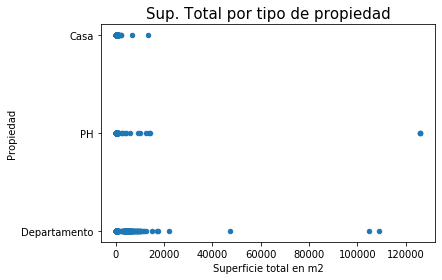

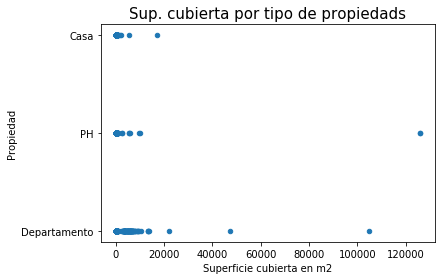

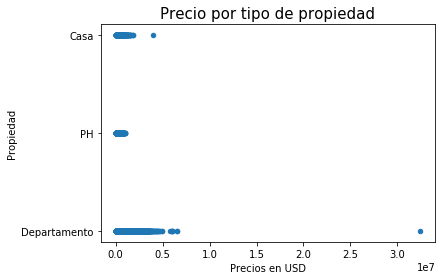

In [36]:
data_clean.plot.scatter(y ='property_type', x = 'surface_total')
plt.title('Sup. Total por tipo de propiedad', size = 15)
plt.ylabel('Propiedad')
plt.xlabel('Superficie total en m2')

data_clean.plot.scatter(y ='property_type', x = 'surface_covered')
plt.title('Sup. cubierta por tipo de propiedads', size = 15)
plt.ylabel('Propiedad')
plt.xlabel('Superficie cubierta en m2')

data_clean.plot.scatter(y ='property_type', x = 'price_USD')
plt.title('Precio por tipo de propiedad', size = 15)
plt.ylabel('Propiedad')
plt.xlabel('Precios en USD')

plt.show()

De estos gráficos podemos ver cómo se aparecen nuevamente los **valores atipicos**, es decir, valores muy alejados de las concentraciones de los mismos en cada categoria para cada tipo de propiedad.
Debido a que los valores atípicos pueden tener un efecto desproporcionado en los resultados estadísticos, como la media, lo que puede conducir a interpretaciones engañosas. 

Por lo tanto, comenzaremos a limpiar estos datos del dataset (aquí seguramente tambien entren los outliers de los atributos que graficamos previamente, lo cual podemos verificaremos más adelante).

Exploraré detenidamente la variable `surface_total` con un gráfico de cajas:


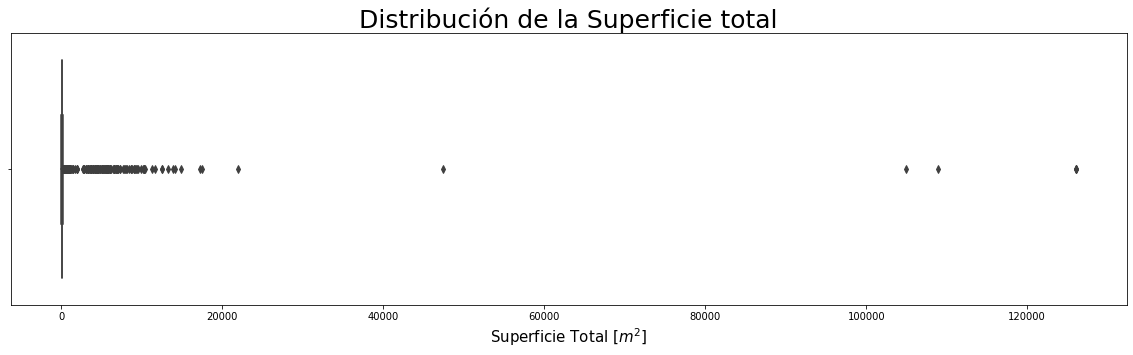

In [37]:
plt.figure(figsize = (20,5))
sns.boxplot(data_clean['surface_total'])
plt.xlabel('Superficie Total [$m^{2}$]', size = 15)
plt.title('Distribución de la Superficie total',size = 25)
plt.show()

Se ven claramente que debido a los outliers no se puede gráficar correctamente.
Veré entonces los datos estadísticos para decidir en dónde hacer un corte razonable (manualmente en parte lo que vimos en la función `describe`:

In [38]:
minimum_sup = np.amin(data_clean.surface_total)
maximum_sup = np.amax(data_clean.surface_total)
mean_sup = np.mean(data_clean.surface_total)
median_sup = np.median(data_clean.surface_total)
std_sup = np.std(data_clean.surface_total)

print("Estadisticas para las Superficies Totales de los inmuebles de Capital Federal en m2:\n")
print("Valor mínimo: {}".format(minimum_sup)) 
print("Valor máximo: {}".format(maximum_sup))
print("Valor promedio: {}".format(mean_sup))
print("Valor medio: {}".format(median_sup))
print("Desviación estandar de las superficies totales: {} \n".format(std_sup))


q1_sup = data_clean['surface_total'].quantile(0.25)
q3_sup = data_clean['surface_total'].quantile(0.75)
q99_sup = data_clean['surface_total'].quantile(0.99)
iq_sup = q3_sup - q1_sup

print("Primer cuartil: {}".format(q1_sup))
print("Tercer cuartil: {}".format(q3_sup))
print("99 cuartil: {}".format(q99_sup))
print("Rango intercuartílico: {}".format(iq_sup))

Estadisticas para las Superficies Totales de los inmuebles de Capital Federal en m2:

Valor mínimo: 10.0
Valor máximo: 126062.0
Valor promedio: 110.33620924080986
Valor medio: nan
Desviación estandar de las superficies totales: 989.8616758495222 

Primer cuartil: 49.0
Tercer cuartil: 110.0
99 cuartil: 400.0
Rango intercuartílico: 61.0


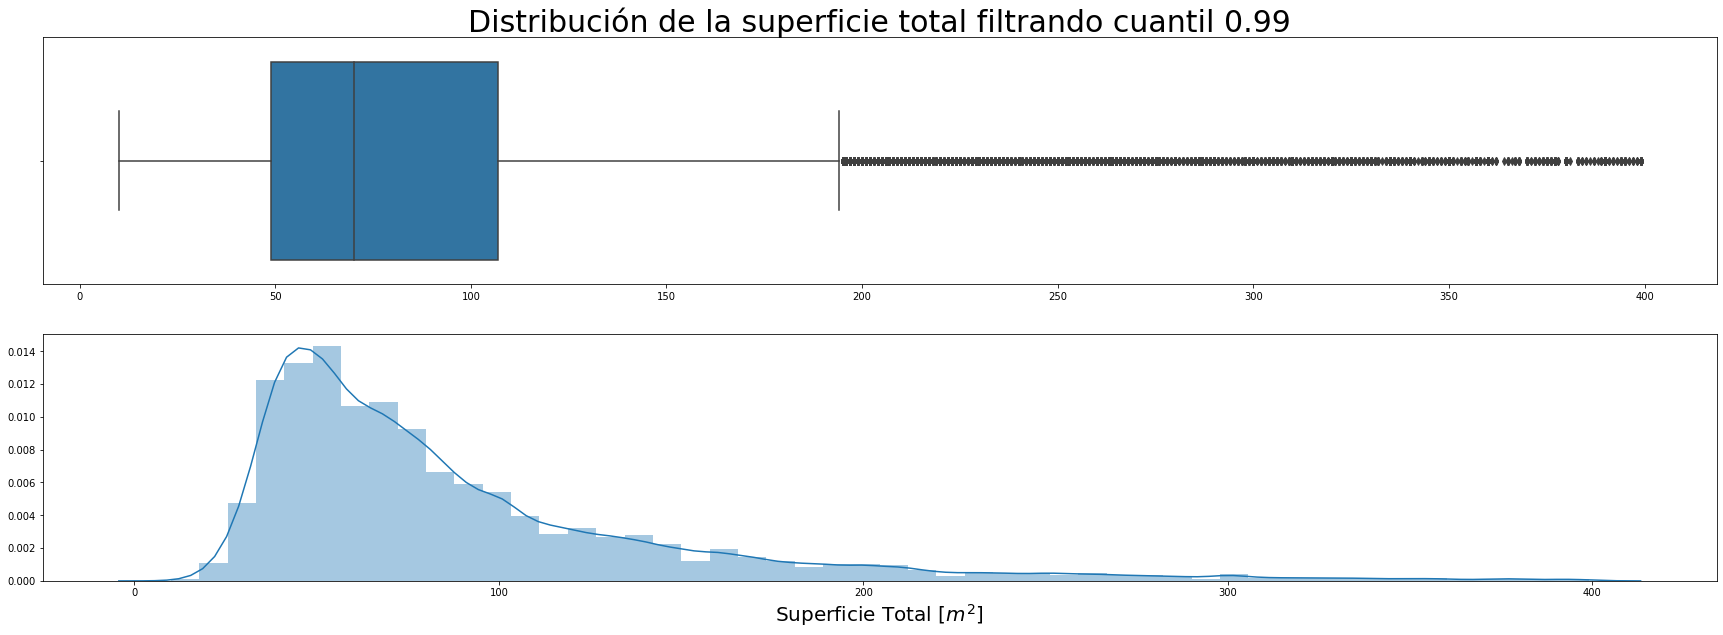

In [39]:
q99 = data_clean['surface_total'] < data_clean['surface_total'].quantile(0.99)

plt.figure(figsize = (30,10))

plt.subplot(2,1,1)
sns.boxplot(data_clean['surface_total'][q99])
plt.xlabel("")
plt.title('Distribución de la superficie total filtrando cuantil 0.99', size = 30)

plt.subplot(2,1,2)
sns.distplot(data_clean['surface_total'][q99])
plt.xlabel('Superficie Total [$m^{2}$]', size = 20)

plt.show()

Aquí podemos notar, que luego de los 150 m2 de superficie total comienzan a haber outliers, por lo cual, es conveniente filtrar nuestros datos allí.

In [40]:
data_clean2 = data_clean[data_clean['surface_total'] <= 150] 
print(data_clean.shape)
data_clean2.head()


(88493, 10)


,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price_USD,title,description,property_type
0,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento
1,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH
2,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH
3,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH
5,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH


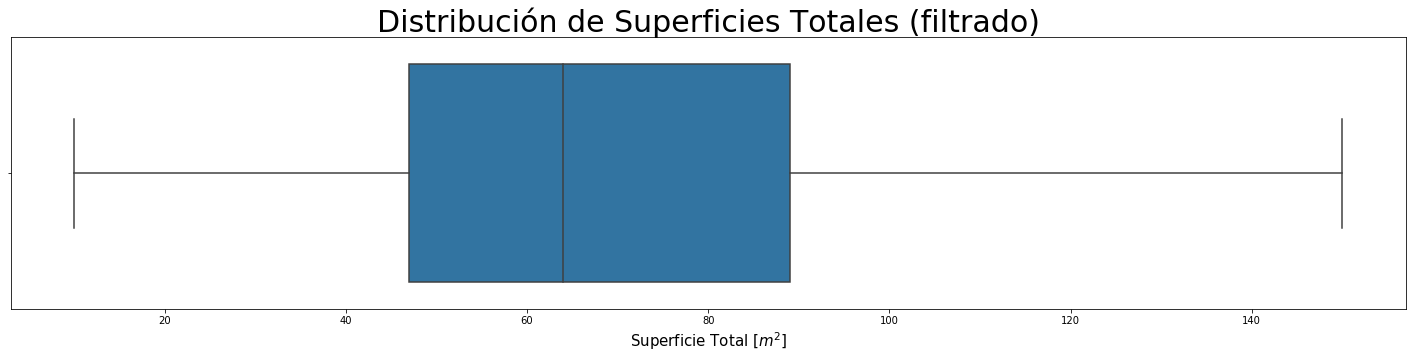

In [41]:
plt.figure(figsize = (25,5))
sns.boxplot(x = 'surface_total', data = data_clean2) #volvemos a graficar para verificar la distribución
plt.title('Distribución de Superficies Totales (filtrado)', size = 30)
plt.xlabel('Superficie Total [$m^{2}$]', size = 15)
plt.show()

In [42]:
data_clean = data_clean2  #'sobreescribimos' el mismo dataset 'data_clean' luego de los cambios decididos para continuar
data_clean.shape

(69875, 10)

Para continuar es analizando **errores** que puede llegar a haber en el dataset entiendo que **las propiedades NO pueden tener `surface_covered` mayor a `surface_total`.** En este caso entonces, filtraremos estos errores para saber si existen en nuestro dataset.

In [43]:
error = data_clean[data_clean.surface_total <= data_clean.surface_covered] 
print('Hay {} observaciones con errores en la superficie.'.format(error.shape[0]))
error

Hay 22151 observaciones con errores en la superficie.


,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price_USD,title,description,property_type
0,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento
2,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH
5,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH
6,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Muy lindo PH, con terraza propia, 96m2! por es...",PH
7,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Muy lindo PH, con terraza propia, 96m2! por es...",PH
...,...,...,...,...,...,...,...,...,...,...
146542,Palermo,2.0,1.0,1.0,80.0,80.0,170000.0,A extrenar departamento en venta en Palermo,Simpático departamento a estrenar en Palermo H...,Departamento
146547,Palermo,3.0,2.0,2.0,82.0,82.0,585000.0,VENTA 3 AMBIENTES CON COCHERA Y BAULERA PISO ...,"TORRE QUARTIER BOULEVARD, 3 AMBIENTES ESPECTAC...",Departamento
146548,Palermo,3.0,2.0,2.0,82.0,82.0,475000.0,VENTA 3 AMBIENTES CON COCHERA Y BAULERA - COMP...,"TORRE QUARTIER BOULEVARD, 3 AMBIENTES ESPECTAC...",Departamento
146549,Palermo,3.0,2.0,1.0,84.0,84.0,178000.0,Hermoso PH de 3 ambientes al frente muy lumisoso,Hermoso PH ubicado en el primer piso.al frente...,PH


In [44]:
data_clean = data_clean[data_clean.surface_total > data_clean.surface_covered]  
data_clean.shape

(47316, 10)

Ahora exploraremos el rango que manejamos en `price_USD`:

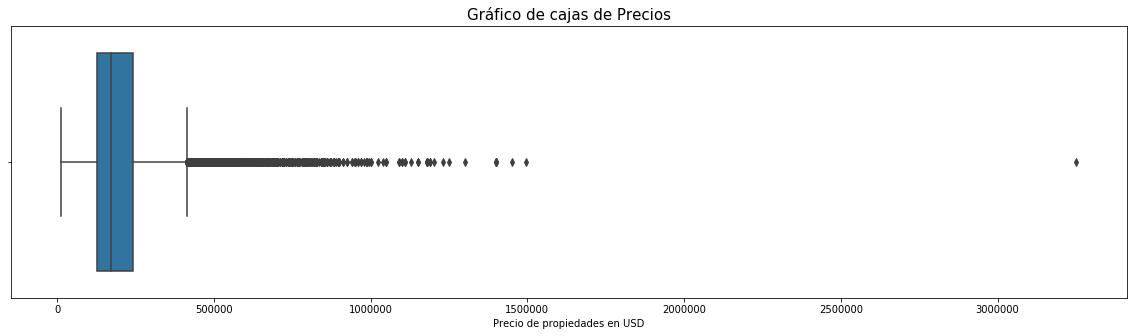

In [45]:
plt.figure(figsize = (20,5))
sns.boxplot( x='price_USD', data = data_clean) 
plt.title('Gráfico de cajas de Precios', size = 15)
plt.xlabel('Precio de propiedades en USD')
plt.show()

In [46]:
minimum_price = np.amin(data_clean.price_USD)
maximum_price = np.amax(data_clean.price_USD)
mean_price = np.mean(data_clean.price_USD)
median_price = np.median(data_clean.price_USD)
std_price = np.std(data_clean.price_USD)

print("Estadísticas para las propiedades de Capital Federal en USD: \n")
print("Precio mínimo: ${}".format(minimum_price)) 
print("Precio máximo: ${}".format(maximum_price))
print("Precio promedio: ${}".format(mean_price))
print("Precio medio: ${}".format(median_price))
print("Desviación estandar de precios: ${} \n".format(std_price))

q1_price = np.percentile(data_clean.price_USD, 0.25)
q3_price = np.percentile(data_clean.price_USD, 0.75)
q99_price = np.percentile(data_clean.price_USD, 0.99)
iq_price = q3_price - q1_price

print("Primer cuartil: ${:,.2f}".format(q1_price))
print("Tercer cuartil: ${:,.2f}".format(q99_price))
print("99 cuartil: ${:,.2f}".format(q3_price))
print("Rango intercuartílico: ${:,.2f}".format(iq_price))

Estadísticas para las propiedades de Capital Federal en USD: 

Precio mínimo: $14000.0
Precio máximo: $3249900.0
Precio promedio: $202538.41533519316
Precio medio: $173000.0
Desviación estandar de precios: $114341.25129068622 

Primer cuartil: $55,000.00
Tercer cuartil: $67,000.00
99 cuartil: $63,100.00
Rango intercuartílico: $8,100.00


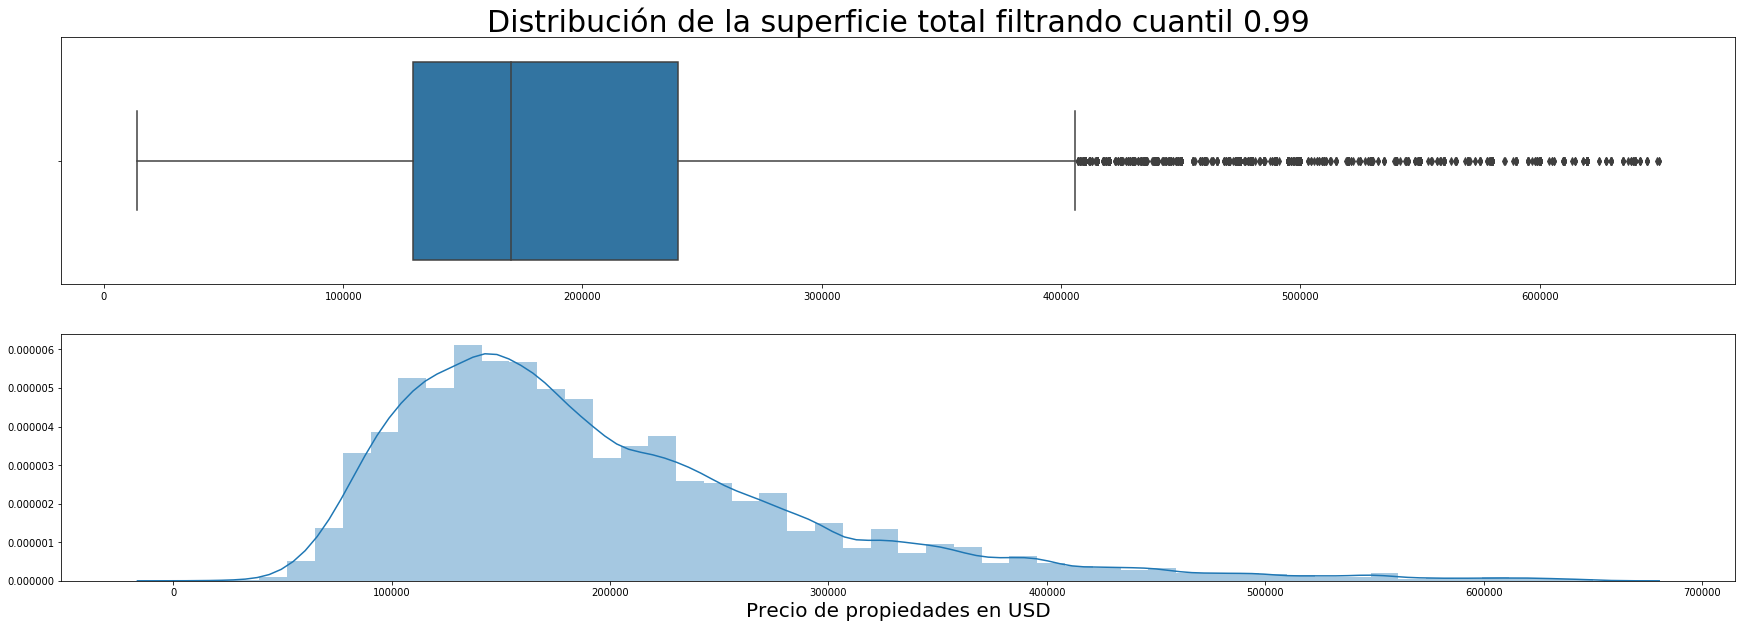

In [47]:
q99_ = data_clean['price_USD'] < data_clean['price_USD'].quantile(0.99)

plt.figure(figsize = (30,10))

plt.subplot(2,1,1)
sns.boxplot(data_clean['price_USD'][q99_])
plt.xlabel("")
plt.title('Distribución de la superficie total filtrando cuantil 0.99', size = 30)

plt.subplot(2,1,2)
sns.distplot(data_clean['price_USD'][q99_])
plt.xlabel('Precio de propiedades en USD', size = 20)

plt.show()

Podemos afirmar entonces que de los 400.000 USD comienzan a haber outliers en éste atributo, por lo cual, filtraremos a partir de allí.

In [48]:
data_clean3 = data_clean[(data_clean['price_USD'] < 400000)] 

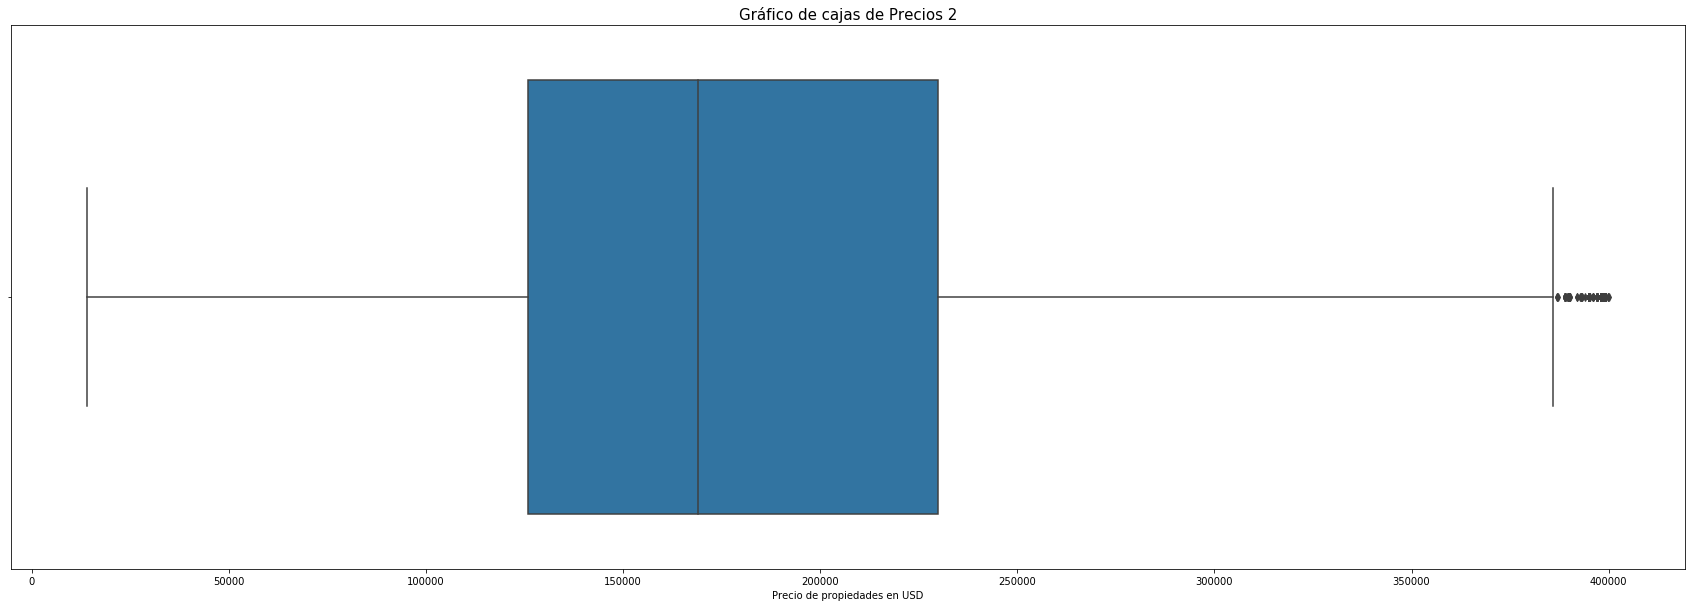

In [49]:
plt.figure(figsize = (30,10))
sns.boxplot( x='price_USD', data = data_clean3) #aquí podemos ver graficamente este gran rango del que vimos en numeros anteriormente
plt.title('Gráfico de cajas de Precios 2', size = 15)
plt.xlabel('Precio de propiedades en USD')
plt.show()

In [50]:
data_clean = data_clean3  #'sobreescribimos' el mismo dataset 'data_clean' luego de los cambios decididos para continuar

In [51]:
data_clean

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price_USD,title,description,property_type
1,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH
3,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH
8,Parque Patricios,1.0,1.0,1.0,45.0,37.0,89000.0,"PH SIN EXPENSAS, AMPLIO MONOAMBIENTE DIVISIBLE...","VENTA DE PH, EN EXCELENTE ESTADO, EN PARQUE PA...",PH
9,Parque Patricios,1.0,1.0,1.0,45.0,37.0,89000.0,"PH SIN EXPENSAS, AMPLIO MONOAMBIENTE DIVISIBLE...","VENTA DE PH, EN EXCELENTE ESTADO, EN PARQUE PA...",PH
10,Villa Pueyrredón,2.0,1.0,2.0,66.0,49.0,170000.0,Villa Pueyrredón PH 2 ambientes con 2 terrazas...,PH CON TERRAZAS PROPIAS EN DUPLEX MUY LUMINOSO...,PH
...,...,...,...,...,...,...,...,...,...,...
146539,Palermo,4.0,3.0,2.0,82.0,77.0,250000.0,VENTA - PALERMO HOLLYWOOD - Honduras 6000 -...,"Departamento en un complejo de torres, ubicado...",Departamento
146540,Palermo,4.0,3.0,2.0,83.0,80.0,215000.0,Departamento semipiso en 4 ambientes Palermo C...,"Muy buen departamento en Palermo-Hollywood, a ...",Departamento
146543,Palermo,3.0,2.0,2.0,85.0,81.0,225000.0,Duplex 2 dormitorios super luminoso y amplio !,Para visitarlo contactar a Marta Cell: 0116153...,Departamento
146545,Palermo,3.0,2.0,2.0,88.0,82.0,399000.0,Palermo Hollywood - 3 Amb c/ dependencia y coc...,"Exclusivo 3 ambientes c/depend., balcón al con...",Departamento


Pues, ya hemos filtrado suficiente nuestro dataset y ya tenemos una idea exploratoria de los datos con los cuales podemos trabajar en base al problema planteado anteriormente para poder implementar un modelo de predición en Machine Learning.

Podemos aquí graficar nuestros datos con la función `pairplot` de Seaborn la cual nos permite **trazar relaciones por pares en un conjunto de datos**. Por defecto, esta función crea una cuadrícula de ejes de modo que cada variable numérica compartirá en el eje y en una sola fila y en el eje x en una sola columna. Los ejes diagonales se tratan de manera diferente, dibujando un gráfico para mostrar la distribución univariada de los datos para la variable en esa columna. 
Con todo esto veremos una gran matriz de disperción y relación entre las instancias y atributos de la siguiente manera:

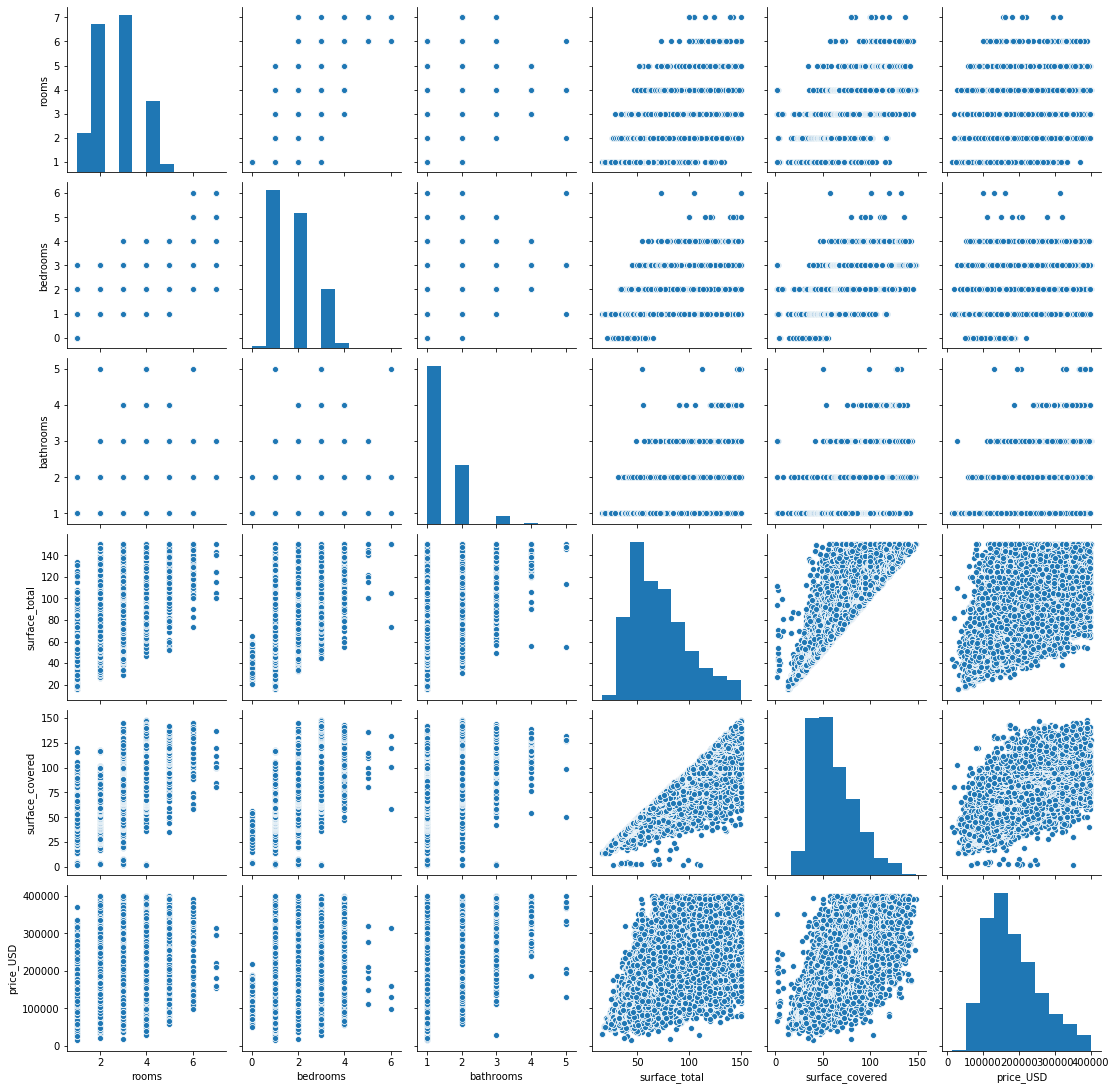

In [56]:
sns.pairplot(data = data_clean)


 **Correlaciones** 
 
Ahora, vamos a crear una matriz de correlación para cuantificar y resumir las relaciones entre las variables pero numéricamente.
Esta matriz de correlación está relacionada estrechamente con matriz de covarianza, de hecho es una versión a escala de la matriz de covarianza, calculada a partir de características estandarizadas.
Es una matriz cuadrada (con el mismo número de filas que de columnas), que contiene el coeficiente de correlación de Pearson.

Aquí nos plantearemos los interrogantes, **¿cuáles son las mejores variables para predecir el precio? ¿qué diferencias se encuentra según cada tipo de propiedad?**
 

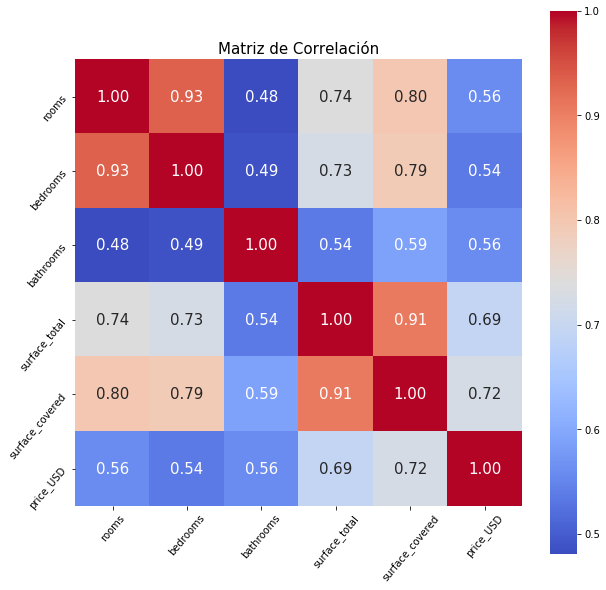

In [57]:
corr = data_clean.corr(method='pearson', min_periods=1) #saco la correlación para graficar
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm') #paleta de  colores
plt.xticks(rotation = 50)
plt.yticks(rotation = 50)
plt.title('Matriz de Correlación', size = 15)
plt.show()

Ahora, sin tener valores negativos, podemos destacar que **entre el precio y la superficie cubierta hay una alta relación de 0.72, así tambien con la total con 0.69**, es decir, el tamaño de la propiedad en venta determina fuertemente el precio. 

Podemos diferenciar por los tres tipos de propiedades que hemos filtrado anteriormente en este grafico de correlación. Para más detalles graficaremos la matriz para cáda tipo de propiedad y así poder estudiar la relación con el precio del inmueble en venta:

In [58]:
#Dividimos la variable categórica 

dptos = data_clean[data_clean.property_type == 'Departamento']
casas = data_clean[data_clean.property_type == 'Casa']
ph = data_clean[data_clean.property_type == 'PH']

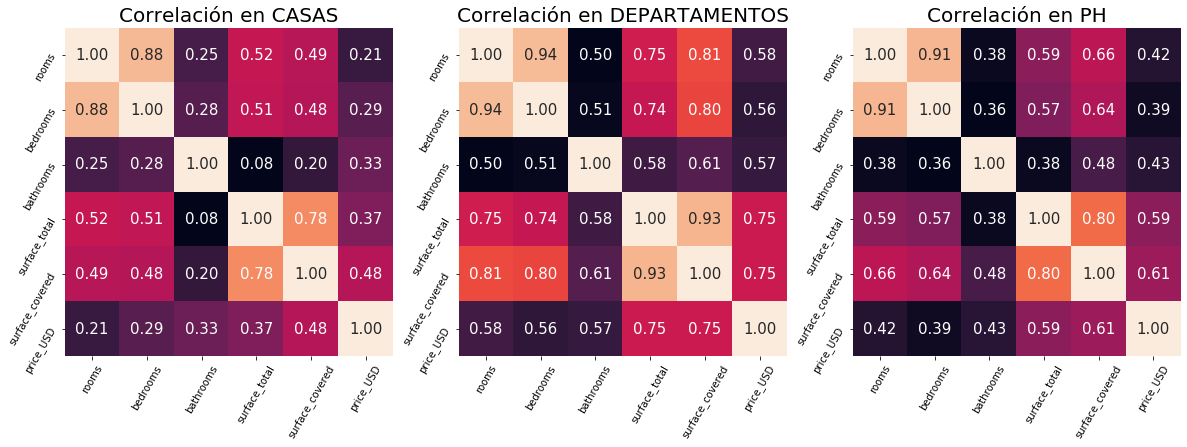

In [59]:
plt.figure(figsize=(20,15))

plt.subplot(1,3,1)
corr_casas = casas.corr(method='pearson', min_periods=1)
sns.heatmap(corr_casas, cbar = False,  square = True, annot=True, fmt= '.2f', annot_kws={'size': 15}) 
plt.xticks(rotation = 60)
plt.yticks(rotation = 60)
plt.title('Correlación en CASAS', size = 20)

plt.subplot(1,3,2)
corr_dptos = dptos.corr(method='pearson', min_periods=1) 
sns.heatmap(corr_dptos, cbar = False,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15}) 
plt.xticks(rotation = 60)
plt.yticks(rotation = 60)
plt.title('Correlación en DEPARTAMENTOS', size = 20)

plt.subplot(1,3,3)
corr_ph = ph.corr(method='pearson', min_periods=1) 
sns.heatmap(corr_ph, cbar = False,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15})
plt.xticks(rotation = 60)
plt.yticks(rotation = 60)
plt.title('Correlación en PH', size = 20)


plt.show()

Con estas tres matrices podemos destacar algunas diferencia en la influencia del precio de una propiedad:

En todas la influencia principal es con el atributo `surface_covered` sobre todo en Departamentos con un 0.75 (al igual que la total, sobre todo si cuenta con balcón).

Las Casas por su parte marca la diferencia mostrando una correlación más homogenea entre las variables que manejamos.

## Desafío

En el dataset provisto hay mucha información, más allá del problema planteado formulamos una pregunta a ser respondida:

**De los anuncios de diciembre de 2019, ¿cuáles fueron los 5 barrios más caros?¿y los más baratos?**

Para comenzar a filtrar estos datos y responder a la propuesta, primero debemos filtrar por año de publicación de los anuncios en el dataset:

In [60]:
desafio = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')  #volvemos al dataset original

In [61]:
desafio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

Notamos que las columnas que refieren a las fechas de alta, baja, y venta de los anuncios inmobiliarios son de tipo categórico. Para poder observarlos o utilizarlos luego en nuestro análisis vamos a cambiar su tipo a `datatime`:

In [62]:
desafio['start_date'] = pd.to_datetime(desafio.start_date)
desafio['created_on'] = pd.to_datetime(desafio.created_on)
desafio['end_date'] = pd.to_datetime(desafio.end_date, errors = 'coerce') #´coerce¨ provoca la sustitución de los valores de grada con NaT.
desafio['end_date'] = pd.to_datetime(desafio.end_date)                

In [63]:
desafio.info() #corroboramos los cambios 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   start_date       146660 non-null  datetime64[ns]
 1   end_date         121559 non-null  datetime64[ns]
 2   created_on       146660 non-null  datetime64[ns]
 3   lat              136735 non-null  float64       
 4   lon              136701 non-null  float64       
 5   l1               146660 non-null  object        
 6   l2               146660 non-null  object        
 7   l3               146660 non-null  object        
 8   rooms            146660 non-null  float64       
 9   bedrooms         146660 non-null  float64       
 10  bathrooms        140703 non-null  float64       
 11  surface_total    126133 non-null  float64       
 12  surface_covered  125046 non-null  float64       
 13  price            146660 non-null  float64       
 14  currency         146

Ahora bien ¿cuántos anuncios hay por año de publicación?

In [64]:
anios = pd.DatetimeIndex(desafio['created_on']).year
print('Cantidad de anuncios por año: \n', anios.value_counts())


Cantidad de anuncios por año: 
 2019    132649
2020     14011
Name: created_on, dtype: int64


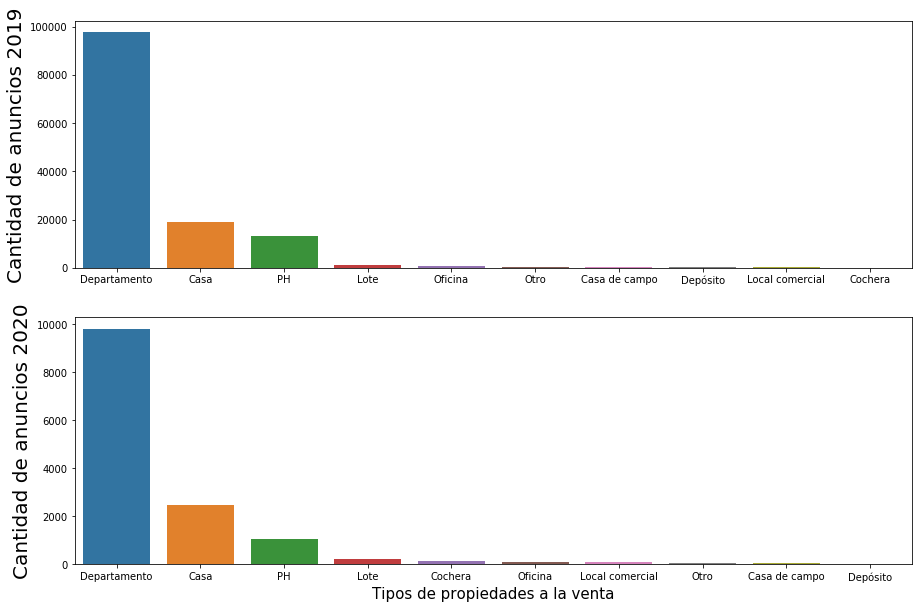

In [65]:
nueve = desafio[pd.DatetimeIndex(desafio['created_on']).year == 2019]
veinte = desafio[pd.DatetimeIndex(desafio['created_on']).year == 2020]

plt.figure(figsize = (15,10))

plt.subplot(2,1,1)
sns.countplot(data = nueve, x = 'property_type', order = nueve.property_type.value_counts().index )
plt.xlabel('')
plt.ylabel('Cantidad de anuncios 2019', size = 20)


plt.subplot(2,1,2)
sns.countplot(data = veinte, x = 'property_type', order = veinte.property_type.value_counts().index )
plt.xlabel('Tipos de propiedades a la venta', size = 15)
plt.ylabel('Cantidad de anuncios 2020', size = 20)
plt.show()

Podemos ver aquí que las ventas son muy similares año a año en los datos que tenemos y su distribución por tipos de propiedades tambien. Podemos destacar que en 2020 la cantidad de ventas de casas y lotes, a destacar a tan pocos meses de empezar el año.

Ahora separaremos los anuncios de diciembre 2019 con los que trabajaremos:

In [66]:
dic_desafio = nueve[pd.DatetimeIndex(nueve['created_on']).month == 12]
print(dic_desafio.shape)

(9172, 19)


Contamos con 9.172 anuncios realizados en diciembre del 2019.

Tambien vale tener en cuenta que un sesgo a marcar es que probablemente éste no sea el unico sitio donde se publiquen anuncios de venta de la Inmobiliaria Properti.

Ahora bien, continuaremos filtrando las columnas que nos importan para poder visualizar la importancia de la operación de venta a nuestro criterio, considerando la fecha creada, la ciudad y barrio, su precios, el tipo de propiedad y por supuesto la operación inmobiliaria:


In [67]:
dic_desafio = dic_desafio.filter(items=['l2', 'l3','surface_total', 'price', 'property_type'])
dic_desafio

,l2,l3,surface_total,price,property_type
1126,Capital Federal,Almagro,70.0,159500.0,PH
1127,Capital Federal,Palermo,100.0,400000.0,PH
1128,Capital Federal,Palermo,65.0,145000.0,PH
1129,Capital Federal,Palermo,77.0,239000.0,PH
1130,Capital Federal,Palermo,120.0,330000.0,PH
...,...,...,...,...,...
121624,Bs.As. G.B.A. Zona Oeste,La Matanza,NaN,550000.0,Casa
121625,Bs.As. G.B.A. Zona Oeste,La Matanza,NaN,600000.0,Casa
121626,Bs.As. G.B.A. Zona Oeste,La Matanza,NaN,310000.0,Casa
121627,Bs.As. G.B.A. Zona Oeste,La Matanza,NaN,200000.0,Casa


Teniendo en cuenta que tenemos ya su precio valuado, podemos sacar su precio por metro cuadrado dividiendo por la superficie total del inmueble.

Sumaremos dichos valores como una columna nueva al dataset.

In [68]:
dic_desafio['price_m2'] = dic_desafio['price']/dic_desafio['surface_total']
dic_desafio.head(3)

,l2,l3,surface_total,price,property_type,price_m2
1126,Capital Federal,Almagro,70.0,159500.0,PH,2278.571429
1127,Capital Federal,Palermo,100.0,400000.0,PH,4000.000000
1128,Capital Federal,Palermo,65.0,145000.0,PH,2230.769231


Con esta columna podremos obtener los inmuebles más caros y más baratos por metro cuadrado.

Ahora con lo obtenido exploraremos la distribución de los datos antes de ordenar por mayores y menores precios:

In [69]:
dic_desafio.describe()

,surface_total,price,price_m2
count,7844.000000,9.172000e+03,7844.000000
mean,215.285059,2.222278e+05,2280.751855
std,1318.942063,2.372484e+05,1204.256169
min,13.000000,1.000000e+04,1.940299
25%,50.000000,1.050000e+05,1599.994444
50%,77.000000,1.600000e+05,2276.119403
75%,136.000000,2.500000e+05,2850.000000
max,67000.000000,5.500000e+06,14666.666667


Podemos notar outliers máximos en precio en este caso pero para éste analisis son importantes:

Pasamos así a filtrar y mostrar el Top 5 de los Barrios más caros y más baratos en Diciembre de 2019 del dataset:

In [70]:
table = pd.pivot_table(dic_desafio, values='price_m2', index=['l3'], aggfunc = np.mean)
mas_caros = table.sort_values('price_m2', ascending=False).iloc[:5]
mas_caros

,price_m2
l3,
Puerto Madero,6140.787831
Las Cañitas,3766.367513
Palermo,3333.427241
Belgrano,3278.333479
Recoleta,3153.723952


In [71]:
mas_baratos = table.sort_values('price_m2', ascending=True).iloc[:5]
mas_baratos

,price_m2
l3,
Cañuelas,112.024712
Marcos Paz,160.654381
Presidente Perón,177.078862
San Vicente,231.470008
General Rodríguez,297.939729


##  Machine Learning

En esta sección, entrenaremos dos modelos de Machine Learning - uno de vecinos más cercanos (KNN) y otro de Árboles de Decisión -  para responder a nuestro problema planteado de predicción del precio de la propiedad, en este caso, tipo `Departamento` en la Ciudad Autónoma de Buenos Aires (`Capital Federal`).

Comenzaremos filtrando el dataset según las intrucciones del proyecto:

In [285]:
#Filtrado de DF
data_raiz = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv') 
data = data_raiz[(data_raiz['l2'] == "Capital Federal") & (data_raiz.property_type.isin(['Departamento','Casa','PH']))]
data = data[(data['surface_total'] >= 15) & (data['surface_total'] <= 1000)]
data = data[(data['price'] <= 4000000)]
data = data.filter(items=['rooms', 'bedrooms','bathrooms','surface_total', 'surface_covered', 'price'])
data = data.dropna()
print('Checkpoint: ', data.shape)

data.head(5)


Checkpoint:  (81019, 6)


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0
2,2.0,1.0,1.0,45.0,45.0,125000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
5,2.0,1.0,1.0,56.0,56.0,150000.0


In [286]:
data.describe() #observo la distribución estadistica de los datos antes de continuar

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,81019.000000,81019.000000,81019.000000,81019.000000,81019.000000,8.101900e+04
mean,3.009652,2.002037,1.553821,95.361779,84.928535,2.637725e+05
std,1.308602,1.049673,0.852672,77.253578,156.133119,2.989499e+05
min,1.000000,0.000000,1.000000,15.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.250000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.800000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.800000e+05
max,26.000000,15.000000,14.000000,1000.000000,17220.000000,4.000000e+06


El objetivo de este proyecto es poder trabajar en el ajuste de modelos y su posterior evaluación.

Para empezar vamos a separar el dataset en un conjunto de entrenamiento (70%) y un conjunto de test (30%).

Separá el dataset en `X_train`, `X_test`, `y_train` e  `y_test` con el tamaño correspondiente:

In [287]:
X = data.drop(['price'], axis=1)
y = data['price']


In [288]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)


Corroboramos que la división de cantidades de Train y de Test tienen la misma forma:

In [289]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(56713, 5) (56713,) (24306, 5) (24306,)


### Modelos de Regresión

Para poder predecir el precio de venta de las propiedades elegimos un modelo de Refresión ya que nuestra variable de predicción (y) es una numérica continua en este caso.

Ahora bien, antes de comenzar a entrenar los modelos de **Árbol de Decisión y KNN**, eligiremos la **metrica de evaluación**. Elijo **RMSE** (Root Mean Squared Error - Error cuadrático medio) ya que el valor es directamente comparable con la variable a predecir,  lo cual me da una base clara de cómo esta entrenado el modelo. Además, éste suele ser el criterio de evaluación más usado para problemas de regresión.

Por otro lado, definiremos un modelo usado como **benchmark**, definiremos entonces un modelo de regresión lineal para comparar.

**Árbol de Decisión**

Comenzaremos entonces con éste modelo, llamando su método y entrenando los datos que hemos dividido para su posterior evaluación.

In [290]:
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor()


Lo entrenamos:

In [291]:
tree_regressor.fit(X_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Y generamos las prediciones para cada conjunto de datos:

In [292]:
y_train_pred_tree = tree_regressor.predict(X_train)
y_test_pred_tree = tree_regressor.predict(X_test)

Ahora para evaluarlo vamos a obtener el RMSE, para ello obtenemos el `mean_squared_error` y luego su raíz cuadrada:

In [293]:
from sklearn.metrics import mean_squared_error

rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_pred_tree))
rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_pred_tree))
print(f'La raíz del error cuadrático medio en Train es de: {rmse_train_tree}')
print(f'La raíz del error cuadrático medio en Test es de: {rmse_test_tree}')

La raíz del error cuadrático medio en Train es de: 53697.561457553245
La raíz del error cuadrático medio en Test es de: 137785.8564786125


Ahora, mediante un loop `for`, crearemos listas de los diferentes errores segun la profundidad del árbol, ésto lo haremos para poder medir dónde es el punto del arbol que es más efectivo y contenga menos errores.

In [294]:
lista_rmse_train_tree = []
lista_rmse_test_tree = []
rmse_train = 0
rmse_test = 0
max_depths = [1,5,6,7,8,9,10,10.5,11,12,13,14,15,16,17,18,19,20,21,22,24,25,30,40,50]

for i in max_depths:
    tree_reg = DecisionTreeRegressor(max_depth = i)
    tree_reg.fit(X_train,y_train)
    
    y_train_pred_tree = tree_reg.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_tree))

    y_test_pred_tree = tree_reg.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_tree))
    
    lista_rmse_train_tree.append(rmse_train)
    lista_rmse_test_tree.append(rmse_test)

Graficamos entonces los errores RMSE con las diferentes profundidades del árbol de la siguiente manera:

El mínimo de RMSE en test es  132653.45681165034  en  16  profundidad del árbol.


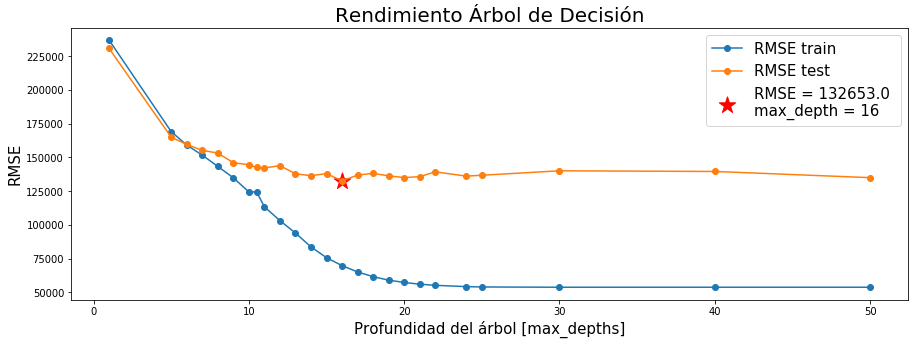

In [296]:
min_test_tree = np.amin(lista_rmse_test_tree)
lista_rmse_test_tree_op = lista_rmse_test_tree.index(min(lista_rmse_test_tree))
max_depths_op = max_depths[lista_rmse_test_tree_op]
print('El mínimo de RMSE en test es ', min_test_tree, ' en ', max_depths_op, ' profundidad del árbol.')

plt.figure(figsize=(15,5))

plt.plot(max_depths, lista_rmse_train_tree, 'o-', label = 'RMSE train')
plt.plot(max_depths, lista_rmse_test_tree, 'o-', label = 'RMSE test')
plt.xlabel('Profundidad del árbol [max_depths]', size = 15)
plt.ylabel('RMSE', size =15)
plt.title('Rendimiento Árbol de Decisión', size = 20)
plt.scatter(max_depths_op, min_test_tree, s=300, marker = '*', 
         label = 'RMSE = {} \nmax_depth = {} '.format(round(min_test_tree),max_depths_op), color = 'red')
plt.legend(loc = 'upper right', fontsize = 15)
plt.savefig('Arbol1.png')

plt.show()

Por lo tanto, viendo éste gráfico puedo decidir que mi modelo tendrá una profundidad de árbol 16. 

Pues vuelvo a entrenar con la optmización del hiperparametro y guardo.

In [298]:
tree_regressor = DecisionTreeRegressor(max_depth = 16)
tree_regressor.fit(X_train, y_train)
y_train_pred_tree = tree_regressor.predict(X_train)
y_test_pred_tree = tree_regressor.predict(X_test)

rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_pred_tree))
rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_pred_tree))
print(f'La raíz del error cuadrático medio en Train es de: {rmse_train_tree}')
print(f'La raíz del error cuadrático medio en Test es de: {rmse_test_tree}')


La raíz del error cuadrático medio en Train es de: 69742.39135625216
La raíz del error cuadrático medio en Test es de: 135854.8100111002


Notamos que de la primer predicción los errores bajaron. Pero claramente sus valores de error en precio siguen siendo demasiado altos para los números de precios USD que manejamos.

**KNN - k-Nearest Neighbors**

Continuamos ahora con el modelo 'vecinos más cercanos'

In [299]:
from sklearn.neighbors import KNeighborsRegressor #llamo al método

knn_regressor = KNeighborsRegressor()
knn_regressor

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

Entreno y predigo el modelo:

In [300]:
knn_regressor.fit(X_train, y_train) 

y_train_pred_knn = knn_regressor.predict(X_train)
y_test_pred_knn = knn_regressor.predict(X_test)

Calculo RMSE:

In [301]:
from sklearn.metrics import mean_squared_error

rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_pred_knn))
rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_pred_knn))
print(f'La raíz del error cuadrático medio en Train es de: {rmse_train_knn}')
print(f'La raíz del error cuadrático medio en Test es de: {rmse_test_knn}')

La raíz del error cuadrático medio en Train es de: 123757.30597731916
La raíz del error cuadrático medio en Test es de: 146737.85656181545


Al igual que en Árbol, crearé en un loop las posibilidades de errores con los diferentes vecinos para evaluar su mejor versión:

In [302]:
lista_rmse_train_knn = []
lista_rmse_test_knn = []
vecinos = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,25,30,35,40,45,50]

for i in vecinos:
    knn_reg = KNeighborsRegressor(n_neighbors = i)
    knn_reg.fit(X_train,y_train)
    
    y_train_pred_knn = knn_reg.predict(X_train)
    rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_pred_knn))

    y_test_pred_knn = knn_reg.predict(X_test)
    rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_pred_knn))
    
    lista_rmse_train_knn.append(rmse_train_knn)
    lista_rmse_test_knn.append(rmse_test_knn)

Y lo graficamos para decidir su hiperparámetro:

Minimo de RMSE en test es  143212.05082397975  en vecinos 2


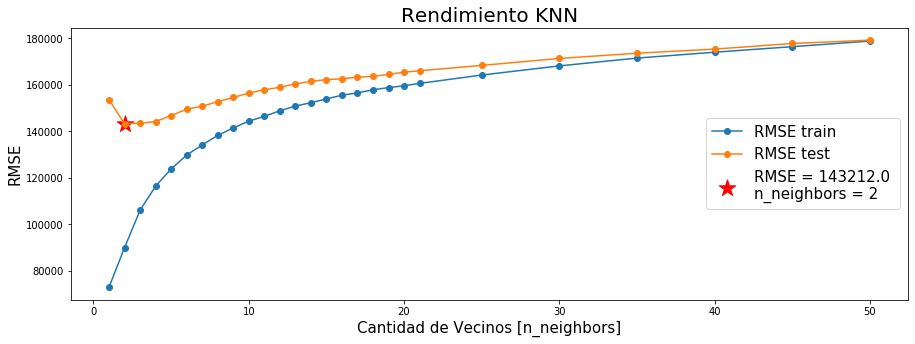

In [303]:
min_test_knn = np.amin(lista_rmse_test_knn)
lista_rmse_test_knn_op = lista_rmse_test_knn.index(min(lista_rmse_test_knn))
vecinos_op = vecinos[lista_rmse_test_knn_op]

print('Minimo de RMSE en test es ', min_test_knn,' en vecinos', vecinos_op)


plt.figure(figsize=(15,5))

plt.plot(vecinos, lista_rmse_train_knn, 'o-', label = 'RMSE train')
plt.plot(vecinos, lista_rmse_test_knn, 'o-', label = 'RMSE test')
plt.xlabel('Cantidad de Vecinos [n_neighbors]', size = 15)
plt.ylabel('RMSE', size =15)
plt.title('Rendimiento KNN', size = 20)
plt.scatter(vecinos_op, min_test_knn, s=300, marker = '*', 
         label = 'RMSE = {} \nn_neighbors = {} '.format(round(min_test_knn),vecinos_op), color = 'red')
plt.legend(loc = 'center right', fontsize = 15)
plt.savefig('KNN1.png')

plt.show()

Por lo tanto, viendo el gráfico anterior decido que mi modelo tendrá una profundidad de 2 vecinos. 

Lo vuelvo a entrenar con su parametro y guardo:

In [304]:
knn_regressor = KNeighborsRegressor(n_neighbors = 2)
knn_regressor.fit(X_train, y_train)
y_train_pred_knn = knn_regressor.predict(X_train)
y_test_pred_knn = knn_regressor.predict(X_test)
rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_pred_knn))
rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_pred_knn))
print(f'La raíz del error cuadrático medio en Train es de: {rmse_train_knn}')
print(f'La raíz del error cuadrático medio en Test es de: {rmse_test_knn}')


La raíz del error cuadrático medio en Train es de: 89922.17437753602
La raíz del error cuadrático medio en Test es de: 143212.05082397975


Vemos que de la primer predicción los errores bajaron. Pero claramente aún sus valores de error en precio siguen siendo demasiado altos.

In [305]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression() #benchmark
linear_model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 69742.39135625216
Raíz del error cuadrático medio en Test: 135854.8100111002


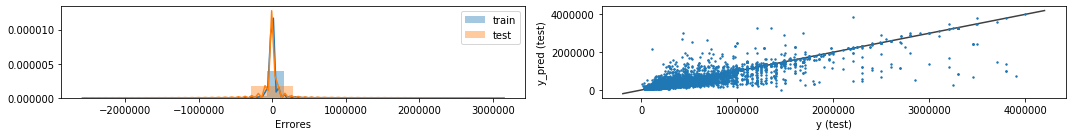

Modelo: Vecinos más cercanos - KNN
Raíz del error cuadrático medio en Train: 89922.17437753602
Raíz del error cuadrático medio en Test: 143212.05082397975


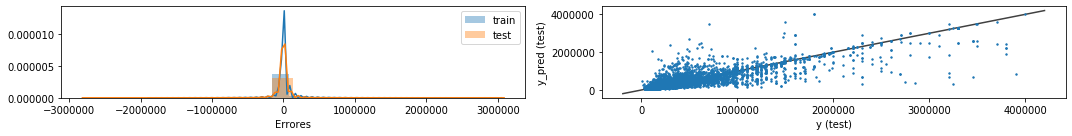

Modelo: Regresión Lineal
Raíz del error cuadrático medio en Train: 201415.1207773642
Raíz del error cuadrático medio en Test: 197037.27938270665


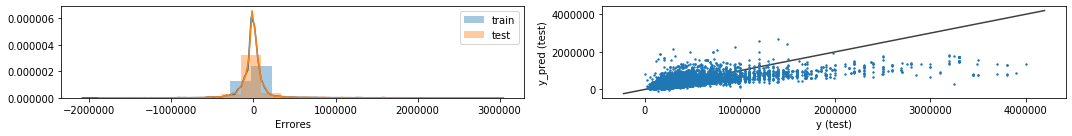

In [308]:
modelos = ['Árbol de Decisión', 'Vecinos más cercanos - KNN', 'Regresión Lineal',]

for i, model in enumerate([tree_regressor, knn_regressor, linear_model]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (15,2))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('Errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]), 
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

En paralelo a esto y para ver en números estos resultados más profundamente también, reentrenamos los regresorores y mostramos en un dataframe la **comparación entre los valores reales, los predichos y su diferencia**:

In [309]:
tree_regressor.fit(X_train, y_train)
y_pred = tree_regressor.predict(X_test)
val_real = pd.Series(y_test.values)
val_pred = pd.Series(y_pred)

predicciones_tree = pd.concat([val_real.rename('ValorReal'),
                          val_pred.rename('ValorPred') ,
                          abs(val_real-val_pred).rename('Dif(+/-)'),
                          abs((val_real-val_pred)/(val_pred)*100).rename('Porcentaje de la diferencia')] ,  axis=1)

predicciones_tree


,ValorReal,ValorPred,Dif(+/-),Porcentaje de la diferencia
0,450000.0,301666.666667,148333.333333,49.171271
1,149950.0,165283.035714,15333.035714,9.276836
2,129000.0,124068.518519,4931.481481,3.974805
3,115000.0,87892.982143,27107.017857,30.840935
4,105000.0,148872.793103,43872.793103,29.469987
...,...,...,...,...
24301,210000.0,289427.272727,79427.272727,27.442912
24302,1400000.0,899000.000000,501000.000000,55.728587
24303,360000.0,303537.037037,56462.962963,18.601672
24304,215000.0,217857.142857,2857.142857,1.311475


In [310]:
knn_regressor.fit(X_train, y_train)
y_pred = knn_regressor.predict(X_test)
val_real = pd.Series(y_test.values)
val_pred = pd.Series(y_pred)

predicciones_knn = pd.concat([val_real.rename('ValorReal'),
                          val_pred.rename('ValorPred') ,
                          abs(val_real-val_pred).rename('Dif(+/-)'),
                          abs((val_real-val_pred)/(val_pred)*100).rename('Porcentaje de la diferencia')] ,  axis=1)

predicciones_knn


,ValorReal,ValorPred,Dif(+/-),Porcentaje de la diferencia
0,450000.0,329000.0,121000.0,36.778116
1,149950.0,192000.0,42050.0,21.901042
2,129000.0,132500.0,3500.0,2.641509
3,115000.0,108338.0,6662.0,6.149274
4,105000.0,151500.0,46500.0,30.693069
...,...,...,...,...
24301,210000.0,235000.0,25000.0,10.638298
24302,1400000.0,358500.0,1041500.0,290.516039
24303,360000.0,405000.0,45000.0,11.111111
24304,215000.0,215000.0,0.0,0.000000


**Primeras conclusiones**

Luego de éste primer recorrido observando los valores de RMSE obtenidos a partir de los modelos con los hiperparámetros optimizados de los datos de la consigna, se puede ver que los errores son excesivamente altos de 135854 USD (en el modelo mejor desempeñado Árbol de Decisión) teniendo en cuenta que el rango de precios visualizado al aplicar el cuantil 0.90 en el análisis de los datos y la media de la variable price que es de 260.000 USD aproximadamente. 
Sin embargo, en estas comparaciones podemos remarcar nuevamente que **el modelo que mejor se desempeñó fue el Árbol de Decisión** ya que tiene el menor RMSE en test de los tres modelos probados aquí y la Regresión Lineal tuvo el peor desempeño.

Ahora bien podemos plantear una mejor metodologia, como entendimos anteriormente el precio es determinado por la superficie y tambien otras variables importantes en el rubro inmobiliario son el tipo de propiedad y su ubicación. Por este motivo, intentaré entrenar los modelos con el dataset trabajado personalmente en la consigna anterior, al cual llame `data_clean`. 
Además, antes debo convertir éstas variables categoricas que destaque como importantes, en valores numéricos para que puedan ser aplicadas a los modelos regresivos, para ello aplicaré las **variables dummy** modificando el dataset personal en los atributos `property_type` (Casa, Departamento y PH) y `l3` de Capital Federal.

Procedo entonces, a entrenar ML desde mi `data_clean`:

In [314]:
dummy_tipos = pd.get_dummies(data_clean['property_type']) #vuelvo numericas éstas categorias
dummy_barrio = pd.get_dummies(data_clean['l3'])
data_ml2 = pd.concat([data_clean,dummy_barrio, dummy_tipos], axis = 1)
data_ml2 = data_ml2.drop(['l3','title', 'description','property_type'], axis =1) #elimino las columnas categoricas
data_ml2.dropna(inplace=True)
print(data_ml2.shape)
data_ml2.head(2)

(44803, 66)


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price_USD,Abasto,Agronomía,Almagro,Balvanera,...,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque,Casa,Departamento,PH
1,2.0,1.0,2.0,70.0,58.0,159000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2.0,1.0,1.0,85.0,50.0,295000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [315]:
X_2 = data_ml2.drop(['price_USD'], axis=1)
y_2 = data_ml2['price_USD']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y_2, test_size=0.30) #Divido las muestras
print(X_train2.shape, y_train2.shape, X_test2.shape, y_test2.shape)

(31362, 65) (31362,) (13441, 65) (13441,)


In [316]:
tree_regressor_2 = DecisionTreeRegressor()
knn_regressor_2 = KNeighborsRegressor()
linear_model_2 = LinearRegression() #benchmark

In [317]:
tree_regressor_2.fit(X_train2, y_train2) #entrenamos c/modelo
knn_regressor_2.fit(X_train2, y_train2)
linear_model_2.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [318]:
y_train_pred_tree2 = tree_regressor_2.predict(X_train2)
y_test_pred_tree2 = tree_regressor_2.predict(X_test2)
y_train_pred_knn2 = knn_regressor_2.predict(X_train2)
y_test_pred_knn2 = knn_regressor_2.predict(X_test2)
y_train_pred_lineal2 = linear_model_2.predict(X_train2)
y_test_pred_lineal2 = linear_model_2.predict(X_test2)


In [319]:
#primer pantallazo de RMSE
rmse_train_tree2 = np.sqrt(mean_squared_error(y_train2, y_train_pred_tree2))
rmse_test_tree2 = np.sqrt(mean_squared_error(y_test2, y_test_pred_tree2))
print('RMSE ÁRBOL 2')
print(f'La raíz del error cuadrático medio en TRAIN es de: {rmse_train_tree2} ')
print(f'La raíz del error cuadrático medio en TEST es de: {rmse_test_tree2} \n')

rmse_train_knn2 = np.sqrt(mean_squared_error(y_train2, y_train_pred_knn2))
rmse_test_knn2 = np.sqrt(mean_squared_error(y_test2, y_test_pred_knn2))
print('RMSE KNN 2')
print(f'La raíz del error cuadrático medio en TRAIN es de: {rmse_train_knn2} ')
print(f'La raíz del error cuadrático medio en TEST es de: {rmse_test_knn2} \n')

rmse_train_lenal2 = np.sqrt(mean_squared_error(y_train2, y_train_pred_lineal2)) #PUNTO Lineal
rmse_test_lineal2 = np.sqrt(mean_squared_error(y_test2, y_test_pred_lineal2))
print('RMSE REGRESIÓN LINEAL 2')
print(f'La raíz del error cuadrático medio en TRAIN es de: {rmse_train_lenal2} ')
print(f'La raíz del error cuadrático medio en TEST es de: {rmse_test_lineal2} \n')

RMSE ÁRBOL 2
La raíz del error cuadrático medio en TRAIN es de: 11374.525671612771 
La raíz del error cuadrático medio en TEST es de: 34794.74820103759 

RMSE KNN 2
La raíz del error cuadrático medio en TRAIN es de: 30212.289427867578 
La raíz del error cuadrático medio en TEST es de: 37602.481091705435 

RMSE REGRESIÓN LINEAL 2
La raíz del error cuadrático medio en TRAIN es de: 38501.24141241194 
La raíz del error cuadrático medio en TEST es de: 28981365262.8095 



Con estos números ya nos damos una idea de cómo han funcionado pero ahora graficaremos los modelos de ÁRBOL y KNN para luego buscar los hiperparametros óptimos:

El mínimo de RMSE en test es  34514.47960042601  en  40  profundidad del árbol.


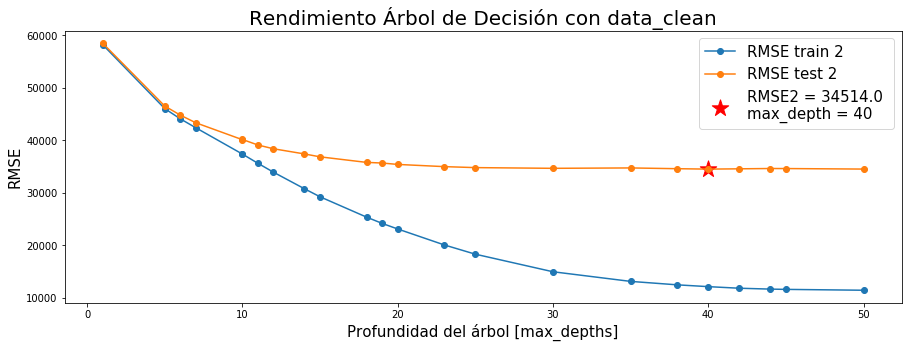

In [320]:
lista_rmse_train_tree2 = []
lista_rmse_test_tree2 = []
rmse_train2 = 0
rmse_test2 = 0
max_depths2 = [1,5,6,7,10,10,11,12,14,15,18,19,20,23,25,30,35,38,40,42,44,45,50]

for i in max_depths2:
    tree_reg2 = DecisionTreeRegressor(max_depth = i)
    tree_reg2.fit(X_train2,y_train2)
    
    y_train_pred_tree2 = tree_reg2.predict(X_train2)
    rmse_train2 = np.sqrt(mean_squared_error(y_train2, y_train_pred_tree2))

    y_test_pred_tree2 = tree_reg2.predict(X_test2)
    rmse_test2 = np.sqrt(mean_squared_error(y_test2, y_test_pred_tree2))
    
    lista_rmse_train_tree2.append(rmse_train2)
    lista_rmse_test_tree2.append(rmse_test2)
    

min_test_tree2 = np.amin(lista_rmse_test_tree2) #optmización
lista_rmse_test_tree_op2 = lista_rmse_test_tree2.index(min(lista_rmse_test_tree2))
max_depths_op2 = max_depths2[lista_rmse_test_tree_op2]
print('El mínimo de RMSE en test es ', min_test_tree2, ' en ', max_depths_op2, ' profundidad del árbol.')


plt.figure(figsize=(15,5)) #ploteo
plt.plot(max_depths2, lista_rmse_train_tree2, 'o-', label = 'RMSE train 2')
plt.plot(max_depths2, lista_rmse_test_tree2, 'o-', label = 'RMSE test 2')
plt.xlabel('Profundidad del árbol [max_depths]', size = 15)
plt.ylabel('RMSE', size =15)
plt.title('Rendimiento Árbol de Decisión con data_clean', size = 20)
plt.scatter(max_depths_op2, min_test_tree2, s=300, marker = '*', 
         label = 'RMSE2 = {} \nmax_depth = {} '.format(round(min_test_tree2),max_depths_op2), color = 'red')
plt.legend(loc = 'upper right', fontsize = 15)
plt.savefig('Arbol2.png')
plt.show()

El óptimo nivel de éste modelo es con 40 en profundidad del árbol. Por lo que lo vuelvo a formular y guardo:

In [321]:
tree_regressor_2 = DecisionTreeRegressor(max_depth = 40)
tree_regressor_2.fit(X_train2, y_train2)
y_train_pred_tree2 = tree_regressor_2.predict(X_train2)
y_test_pred_tree2 = tree_regressor_2.predict(X_test2)

Continúo ahora otimizando **KNN** con los datos personales:

Mínimo de RMSE en test es  37199.88658508438  en vecinos 2


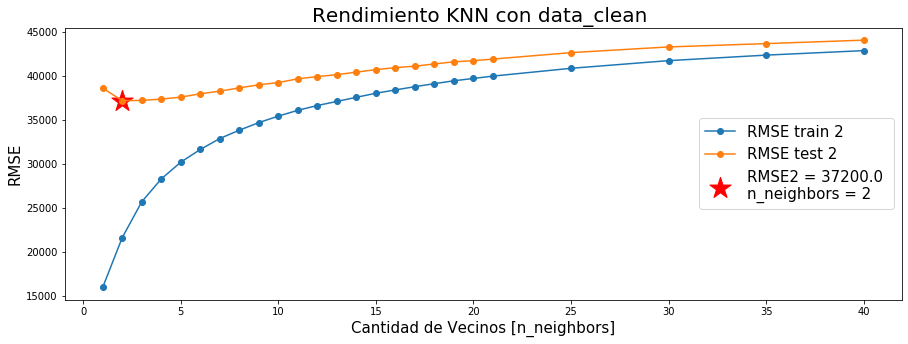

In [322]:
lista_rmse_train_knn2 = []
lista_rmse_test_knn2 = []
vecinos2 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,25,30,35,40]

for i in vecinos2:
    knn_reg = KNeighborsRegressor(n_neighbors = i)
    knn_reg.fit(X_train2,y_train2)
    
    y_train_pred_knn2 = knn_reg.predict(X_train2)
    rmse_train_knn2 = np.sqrt(mean_squared_error(y_train2, y_train_pred_knn2))

    y_test_pred_knn2 = knn_reg.predict(X_test2)
    rmse_test_knn2 = np.sqrt(mean_squared_error(y_test2, y_test_pred_knn2))
    
    lista_rmse_train_knn2.append(rmse_train_knn2)
    lista_rmse_test_knn2.append(rmse_test_knn2)

min_test_knn2 = np.amin(lista_rmse_test_knn2)
lista_rmse_test_knn_op2 = lista_rmse_test_knn2.index(min(lista_rmse_test_knn2))
vecinos_op2 = vecinos[lista_rmse_test_knn_op2]
print('Mínimo de RMSE en test es ', min_test_knn2,' en vecinos', vecinos_op2)


plt.figure(figsize=(15,5))

plt.plot(vecinos2, lista_rmse_train_knn2, 'o-', label = 'RMSE train 2')
plt.plot(vecinos2, lista_rmse_test_knn2, 'o-', label = 'RMSE test 2')
plt.xlabel('Cantidad de Vecinos [n_neighbors]', size = 15)
plt.ylabel('RMSE', size =15)
plt.title('Rendimiento KNN con data_clean ', size = 20)
plt.scatter(vecinos_op2, min_test_knn2, s=500, marker = '*', 
         label = 'RMSE2 = {} \nn_neighbors = {} '.format(round(min_test_knn2),vecinos_op2), color = 'red')
plt.legend(loc = 'center right', fontsize = 15)
plt.savefig('KNN2.png')

plt.show()

En KNN con los datos personales obtengo que su optmización con menores errores es con 2 vecinos.
Lo vuelvo a entrenar con su parametro y guardo:

In [323]:
knn_regressor_2 = KNeighborsRegressor(n_neighbors = 2)
knn_regressor_2.fit(X_train2, y_train2)
y_train_pred_knn2 = knn_regressor_2.predict(X_train2)
y_test_pred_knn2 = knn_regressor_2.predict(X_test2)
rmse_train_knn2 = np.sqrt(mean_squared_error(y_train2, y_train_pred_knn2))
rmse_test_kn2n = np.sqrt(mean_squared_error(y_test2, y_test_pred_knn2))


Una vez optimizado cada modelo en su mejor desempeño pasaré a compararlos en errores y prueba con el modelo de Regresión Lineal. Para poder observar detenidamente a cada uno:

Modelo: Árbol de Decisión 2
Raíz del error cuadrático medio en Train: 12155.386828319508
Raíz del error cuadrático medio en Test: 34436.5308931941 



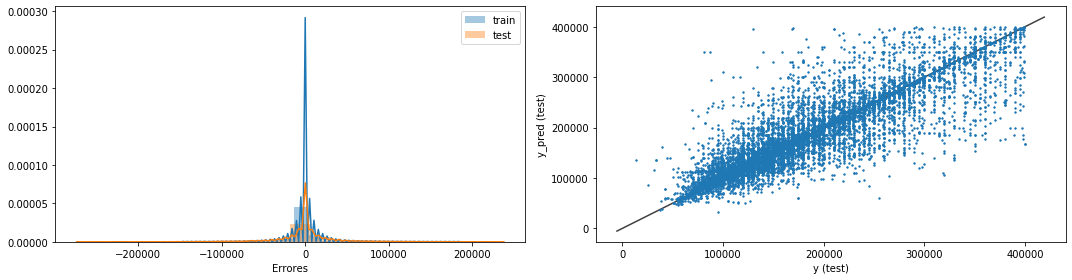

Modelo: Vecinos más cercanos - KNN 2
Raíz del error cuadrático medio en Train: 21640.03687678009
Raíz del error cuadrático medio en Test: 37199.88658508438 



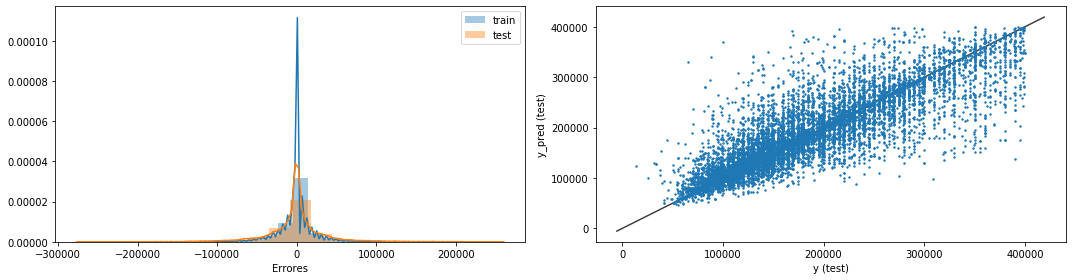

Modelo: Regresión Lineal 2
Raíz del error cuadrático medio en Train: 38501.24141241194
Raíz del error cuadrático medio en Test: 28981365262.8095 



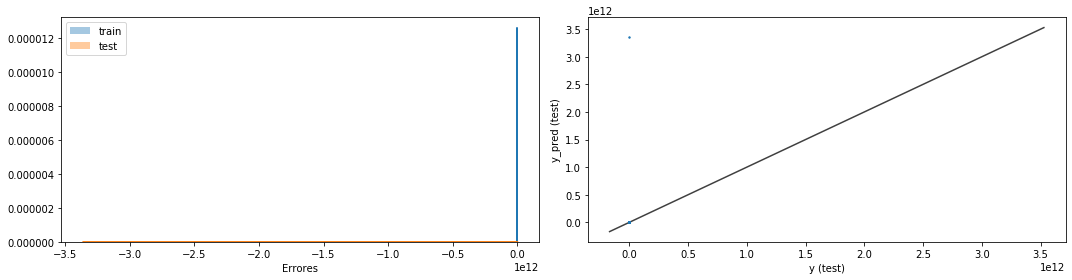

In [324]:
modelos = ['Árbol de Decisión 2', 'Vecinos más cercanos - KNN 2', 'Regresión Lineal 2',]

for i, model in enumerate([tree_regressor_2, knn_regressor_2, linear_model_2]):
    y_train_pred2 = model.predict(X_train2)
    y_test_pred2 = model.predict(X_test2)
    
    print(f'Modelo: {modelos[i]}')
    rmse_train2 = np.sqrt(mean_squared_error(y_train2, y_train_pred2))
    rmse_test2 = np.sqrt(mean_squared_error(y_test2, y_test_pred2))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train2}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test2} \n')
    
    plt.figure(figsize = (15,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train2 - y_train_pred2, bins = 20, label = 'train')
    sns.distplot(y_test2 - y_test_pred2, bins = 20, label = 'test')
    plt.xlabel('Errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test2,y_test_pred2, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]), 
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

Los modelos con el dataset personal mostraron un desempeño superior con los modelos de la consigna, hay una gran diferencia de errores y en este caso también, el mejor desempeño lo muestra nuevamente el Árbol de Decisión. 

Por otro lado, el desempeño de Regresión Lineal fue mucho peor que con los datos de la consigna, es decir este modelo no es apto para este tipo de predición y objetivo. 

Finalmente para una mejor visualización graficaremos los dos modelos **Árbol de Decisión desde consigna vs personal**:

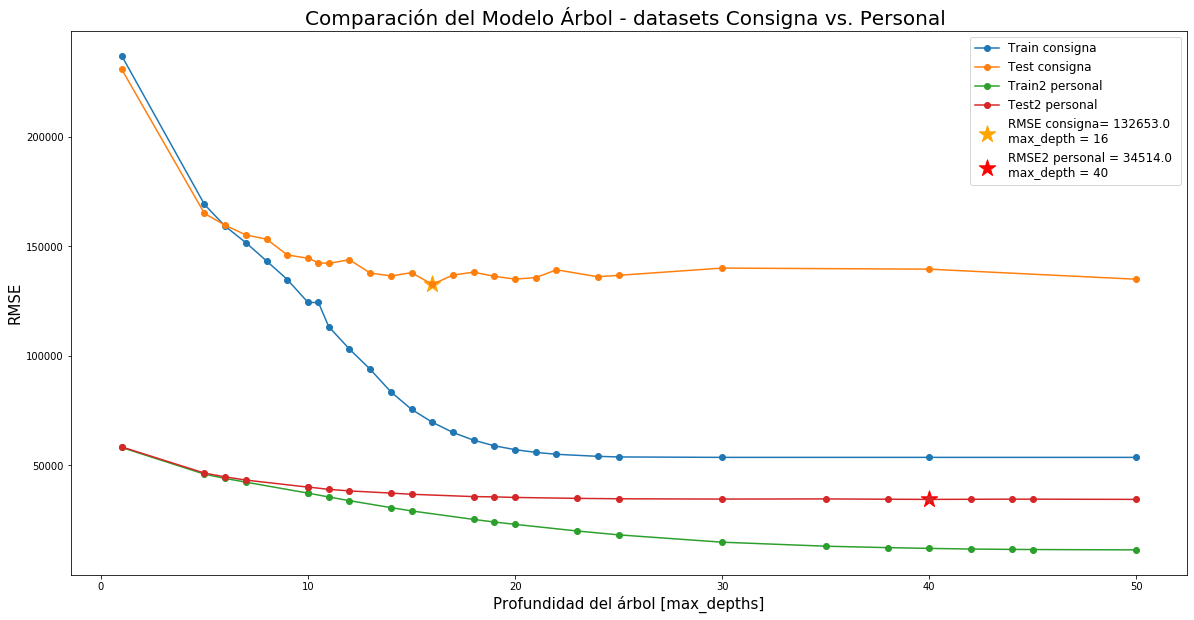

El modelo Personal muestra una disminución de errores RMSE del  73.98 %


In [329]:
plt.figure(figsize=(20,10))

plt.plot(max_depths, lista_rmse_train_tree, 'o-', label = 'Train consigna')
plt.plot(max_depths, lista_rmse_test_tree, 'o-', label = 'Test consigna')
plt.xlabel('Profundidad del árbol [max_depths]', size = 15)
plt.ylabel('RMSE', size =15)
plt.scatter(max_depths_op, min_test_tree, s=300, marker = '*', 
         label = 'RMSE consigna= {} \nmax_depth = {} '.format(round(min_test_tree),max_depths_op), color = 'orange')
plt.plot(max_depths2, lista_rmse_train_tree2, 'o-', label = 'Train2 personal')
plt.plot(max_depths2, lista_rmse_test_tree2, 'o-', label = 'Test2 personal')
plt.xlabel('Profundidad del árbol [max_depths]', size = 15)
plt.ylabel('RMSE', size =15)
plt.scatter(max_depths_op2, min_test_tree2,s=300, marker = '*', 
         label = 'RMSE2 personal = {} \nmax_depth = {} '.format(round(min_test_tree2),max_depths_op2), color = 'red')
plt.legend(loc = 'upper right', fontsize = 12)
plt.title('Comparación del Modelo Árbol - datasets Consigna vs. Personal ', size = 20)

plt.savefig('Arbolvs.png')
plt.show()

print('El modelo Personal muestra una disminución de errores RMSE del ', round(((min_test_tree-min_test_tree2)/min_test_tree)*100,2),'%')


## Conclusiones

Luego de realizar el proyecto y a modo de resumen y conclusión podemos decir varias cosas de nuestro aprendizaje.


Por un lado que, en base a los datos que fueron otorgados desde anuncios de Properati, pude entender de una manera bien profunda los datos orientandolos a poder resolver la problematica planteada, para luego intentar obtener buenos resultados en Machine Learning o simplemente para poder tomar decisiones sobre datos limpios y reales, eliminando outliers y/o entendiendo la naturaleza del negocio. Aquí puedo remarcar que ésta sección se vuelve super importante ya que es una decisión relevante sobre qué datos se dejan o no. Esto marcará luego muchas conclusiones y modelos en el negocio. Tambien noto que, aunque lo veremos más adelante del curso, **falta entender el manejo de outliers con más determinación y/o contar con más herramientas que nos ayuden a hacer un recorte lo más cercano a la 'objetividad'**.

Por otro lado y contando con datos abundantes pudimos emplear varios modelos y pruebas de Machine Learning, aplicando lo aprendido hasta aquí. Primero con el sesgo y filtro marcado por la consigna, donde obtuvimos resultados con una gran cantidad de errores RMSE, entendiendo así que éste filtrado de dataset no fue algo útil para seguir usando. Luego, eligiendo emplear los datos trabajados en la consigna de Analisis Explotatorio (al cual luego llame dataset personal - data_clean) y modificandolo con variables dummy's (para poder tomar variables categoricas con influencia en el precio) pude notar **una mejora del 73.9% de los errores RMSE** que habia entrenado antes. Aunque puedo decir que un error de 34.514 USD continúan siendo altos para el negocio, pude ver mejoras sumamente significativas para entender cómo ajustar nuestro trabajo en este principio con Machine Learning. Finalmente también, en ambas instancias de entrenamiento, el modelo que mejor desempeño mostró fue el **Árbol de Decisión**.

La metodología aplicada dio los resultados buscados, aunque creo importante decir que **los datos pueden estar muy cesgados ya que puede que no todos sean fieles para generalizar en la tasación de un inmueble**. Los datos provenian de anuncios publicitarios de venta, que claramente contaban con instancias para ser mostrados a un posible comprador. Además, puede ser que muchos de los anuncios se publiquen por otros medios y/o falten variables determinantes que determinen los precios, como por ejemplo los niveles inflacionarios, cambios de zonas, antiguedades de las viviendas y accesibilidades de los mismos que creo marcan el precio final y sin contar la cantidad de errores de tipeado.
